###**Necessary modules**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Q1.
This dataset Student Performance Data is from Kaggle. Here we want to classify the student data via GPA level, based on these features: gender, ethnicity, parental education, weekly study time, absences, tutoring, parental support, extracurricular, sports, music, and volunteering.

In [87]:
dataset = pd.read_csv('Student_performance_data _.csv')
dataset

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0            7         1                2                0       0      1   
1            0         0                1                0       0      0   
2           26         0                2                0       0      0   
3           14         0                3                1       0      0   
4           17         1                3                0       0      0   
...        ...       ...              ...              ...     ...    ...   
2387         2         0                4                1       0      0   
2388         4         1                4                0       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
0                0  2.929196         2.0  
1                0  3.042915         1.0  
2                0  0.112602         4.0  
3                0  2.054218         3.0  
4                0  1.288061         4.0  
...            ...       ...         ...  
2387             0  3.455509         0.0  
2388             0  3.279150         4.0  
2389             1  1.142333         2.0  
2390             0  1.803297         1.0  
2391             1  2.140014         1.0  

[2392 rows x 15 columns]

Feature extraction

In [88]:
features = dataset.iloc[:1000, 1:12]
features

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0     17       1          0                  2        19.833723         7   
1     18       0          0                  1        15.408756         0   
2     15       0          2                  3         4.210570        26   
3     17       1          0                  3        10.028829        14   
4     17       1          0                  2         4.672495        17   
..   ...     ...        ...                ...              ...       ...   
995   15       0          1                  1        16.051215        13   
996   15       0          0                  2         9.727833        19   
997   18       1          1                  2         5.969013         0   
998   18       1          0                  2        12.761855         9   
999   17       0          2                  1         5.763043        16   

     Tutoring  ParentalSupport  Extracurricular  Sports  Music  
0           1                2                0       0      1  
1           0                1                0       0      0  
2           0                2                0       0      0  
3           0                3                1       0      0  
4           1                3                0       0      0  
..        ...              ...              ...     ...    ...  
995         0                3                0       1      0  
996         1                4                0       0      0  
997         0                3                0       0      1  
998         1                3                0       0      1  
999         1                2                1       1      0  

[1000 rows x 11 columns]

Label extraction

In [89]:
labels = dataset.iloc[:1000, 14].to_frame()
labels

GradeClass
0           2.0
1           1.0
2           4.0
3           3.0
4           4.0
..          ...
995         4.0
996         4.0
997         0.0
998         2.0
999         4.0

[1000 rows x 1 columns]

Analysis of each feature

In [90]:
print(features.dtypes)
features_des = features.describe(include='all')
print(features_des)

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
dtype: object
               Age       Gender    Ethnicity  ParentalEducation  \
count  1000.000000  1000.000000  1000.000000        1000.000000   
mean     16.534000     0.517000     0.888000           1.744000   
std       1.151595     0.499961     1.034663           1.002731   
min      15.000000     0.000000     0.000000           0.000000   
25%      15.000000     0.000000     0.000000           1.000000   
50%      17.000000     1.000000     0.000000           2.000000   
75%      18.000000     1.000000     2.000000           2.000000   
max      18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences    Tutoring  ParentalSuppor

Here, the data is almost perfect for training machine learning models, and therefore no need for treatments.

Below is the histogram of each attribute.

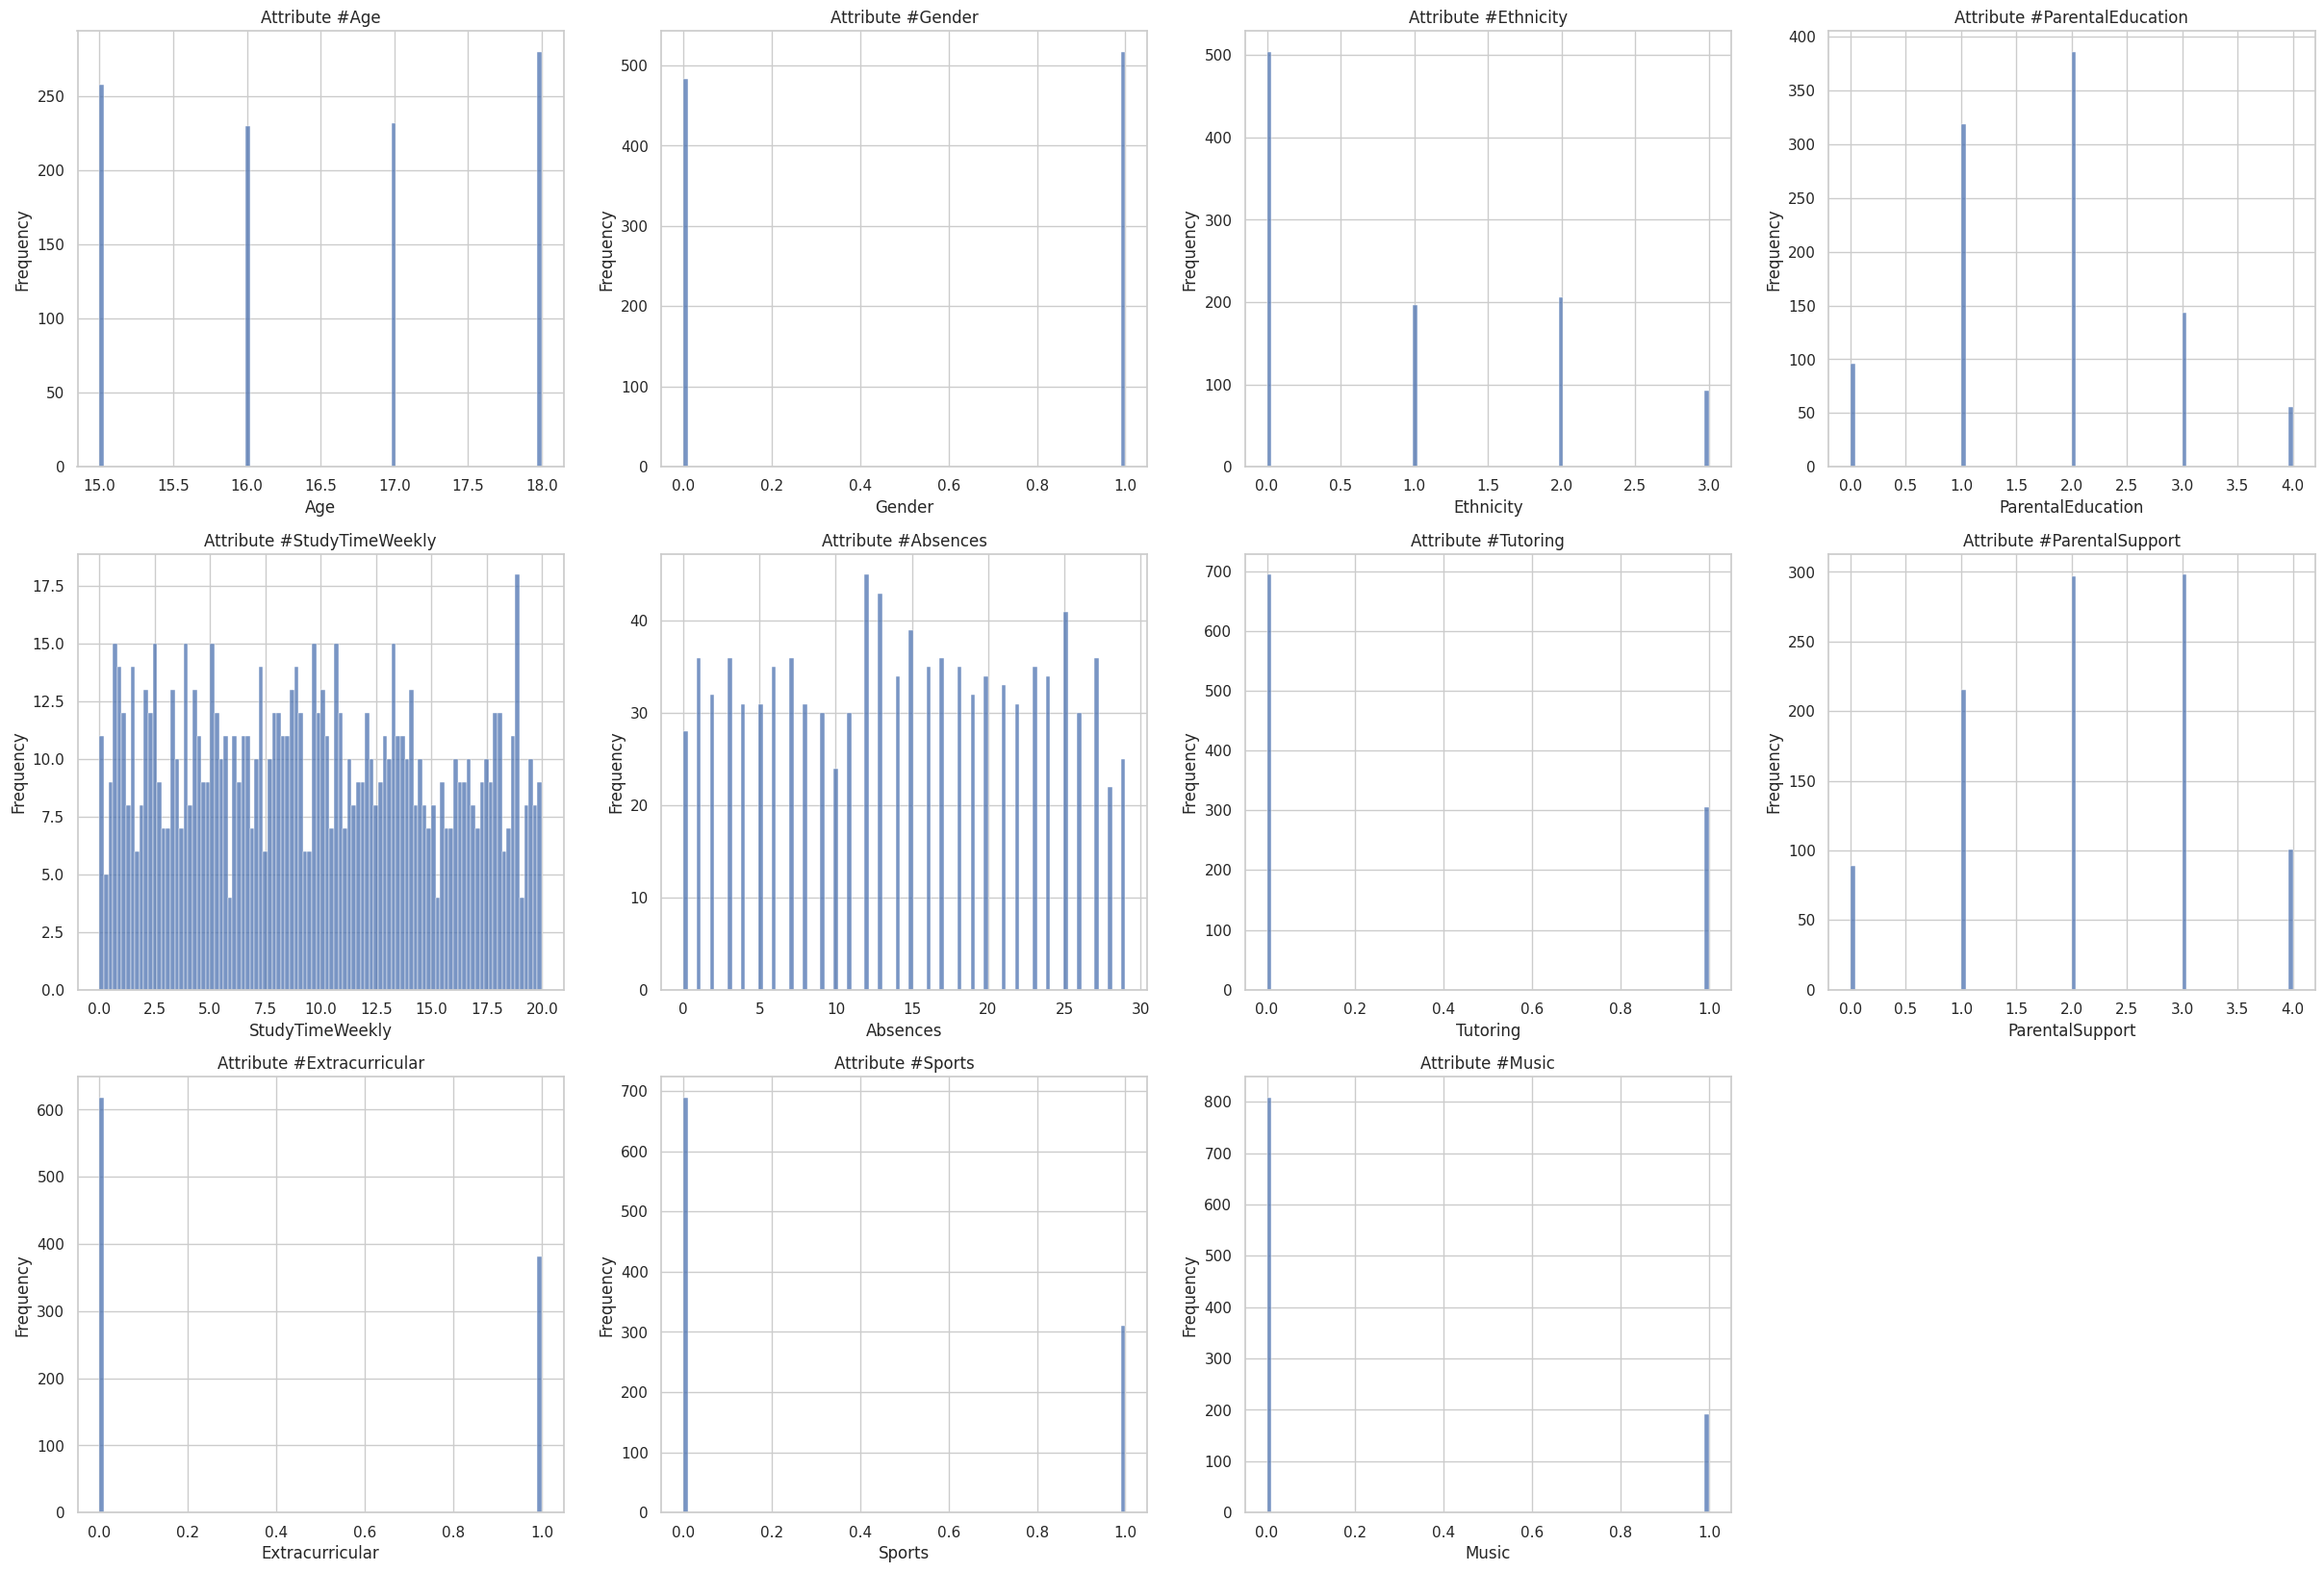

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [91]:
sns.set(style='whitegrid')
m, n = 3, 4

fig, axes = plt.subplots(m, n, figsize=(30, 20))

axes = axes.flatten()

for i, attribute in enumerate(features.columns):
  plt.figure()
  sns.histplot(features[attribute], kde=False, bins=100, ax=axes[i])
  axes[i].set_title(f'Attribute #{attribute}')
  axes[i].set_ylabel('Frequency')

for j in range(i+1, m*n):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

Only "weekly study time" and "absense" are continuous variables, while the others are discrete. Then, when we describe the data via scatter plot we will only discuss these two variables.

##Q2.


Pearson Correlation Coefficient matrix

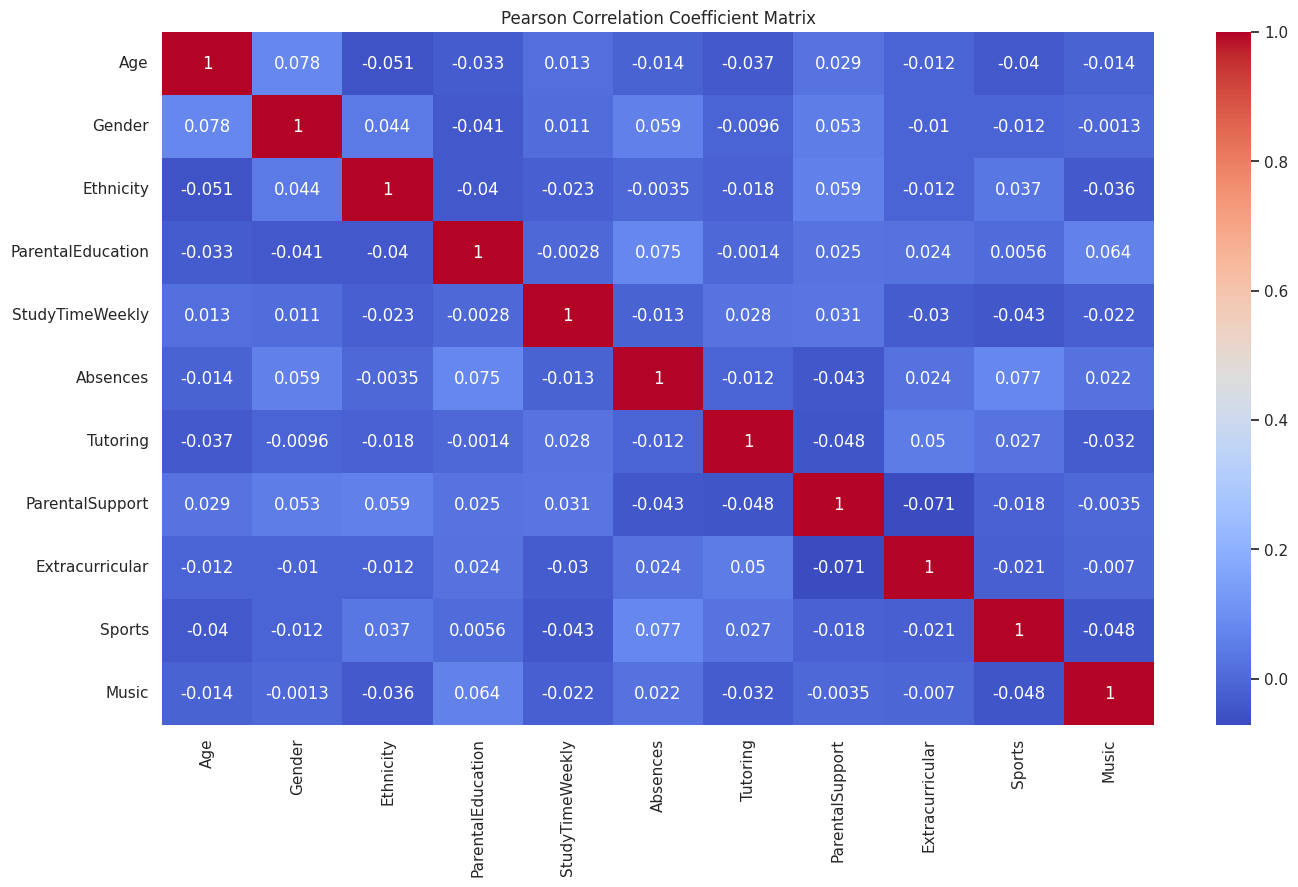

In [92]:
corr_mat = features.corr(method='pearson')

plt.figure(figsize=(16, 9))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

Highly related attributes:

Positive top 3: Age-gender, Absenses-sports, Absenses-parental education. Parental education is a main factor of high absense, but not that much to sports.

Negative top 3:Parental support-extracurricular, parental support-tutoring, absenses-parental support. More parental suppport means fewer absenses, while low parental support means more likelyhood in participating in extracurricular activities and tutoring.

In [93]:
features_and_labels = pd.concat([features, labels], axis=1)
features_and_labels

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0     17       1          0                  2        19.833723         7   
1     18       0          0                  1        15.408756         0   
2     15       0          2                  3         4.210570        26   
3     17       1          0                  3        10.028829        14   
4     17       1          0                  2         4.672495        17   
..   ...     ...        ...                ...              ...       ...   
995   15       0          1                  1        16.051215        13   
996   15       0          0                  2         9.727833        19   
997   18       1          1                  2         5.969013         0   
998   18       1          0                  2        12.761855         9   
999   17       0          2                  1         5.763043        16   

     Tutoring  ParentalSupport  Extracurricular  Sports  Music  GradeClass  
0           1                2                0       0      1         2.0  
1           0                1                0       0      0         1.0  
2           0                2                0       0      0         4.0  
3           0                3                1       0      0         3.0  
4           1                3                0       0      0         4.0  
..        ...              ...              ...     ...    ...         ...  
995         0                3                0       1      0         4.0  
996         1                4                0       0      0         4.0  
997         0                3                0       0      1         0.0  
998         1                3                0       0      1         2.0  
999         1                2                1       1      0         4.0  

[1000 rows x 12 columns]

Scatter plots

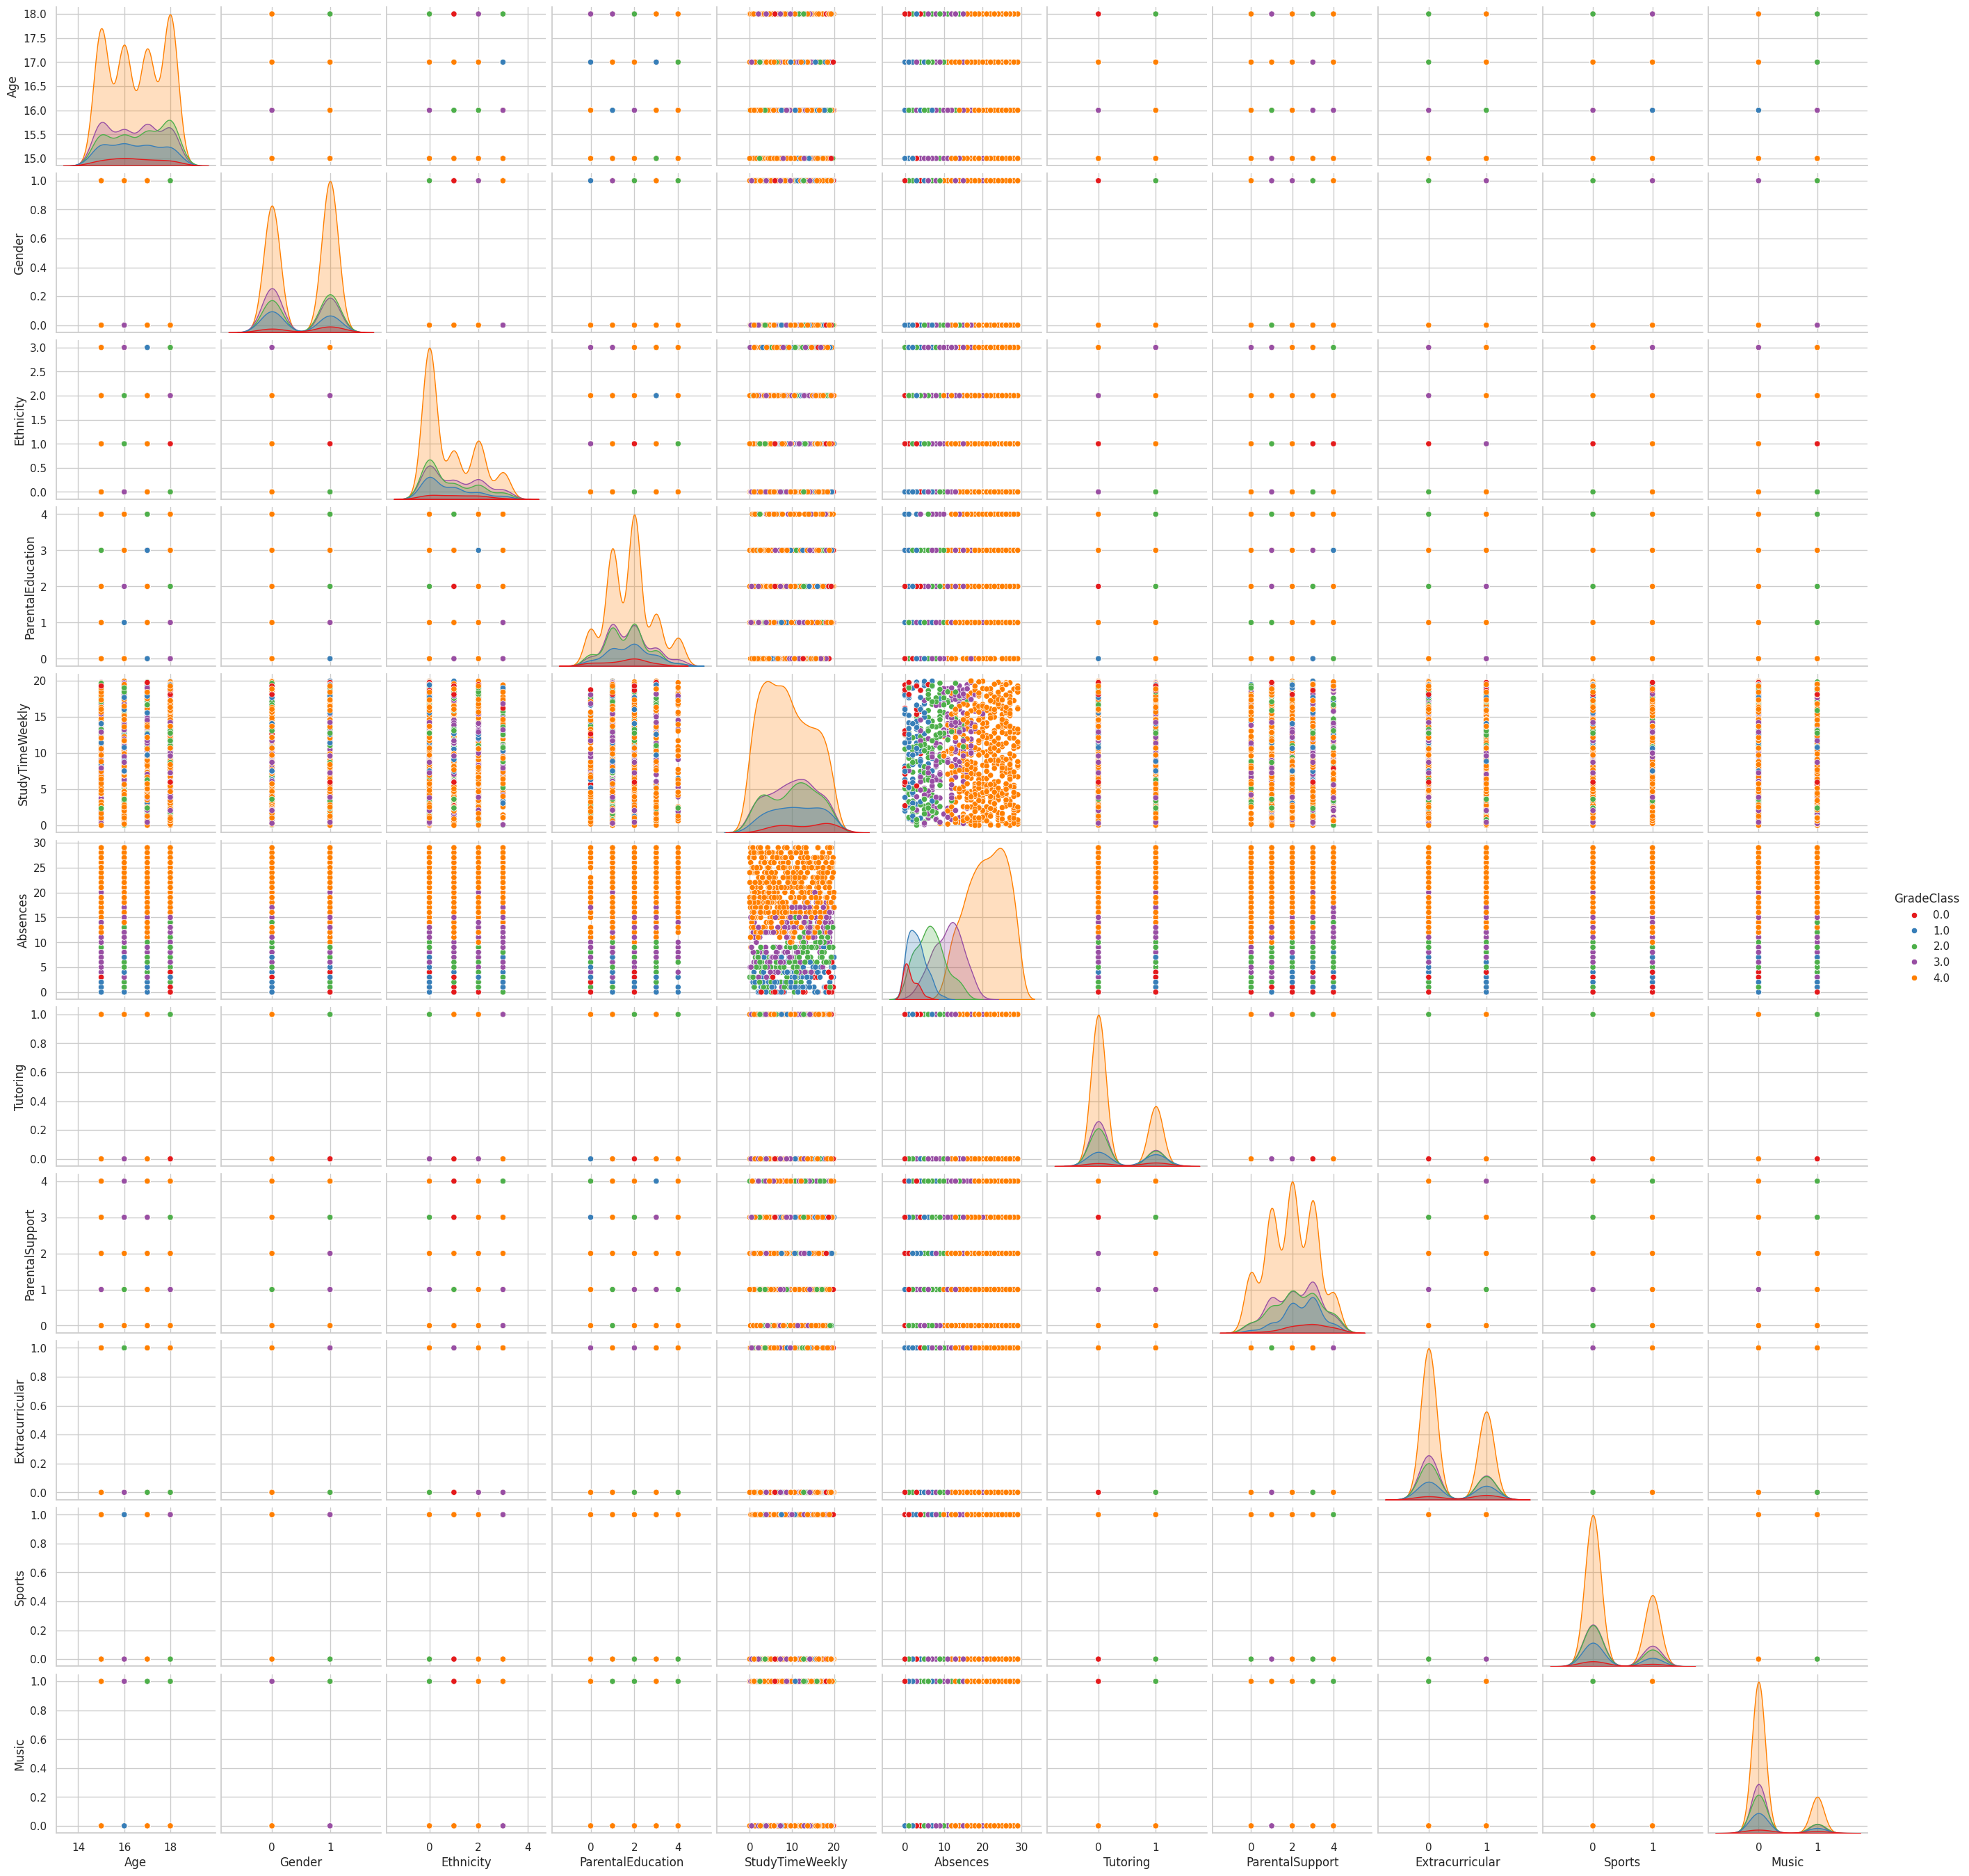

In [139]:
sns.pairplot(features_and_labels, hue='GradeClass', palette='Set1')


##Q3.

We only use the first 1,000 data for training a model.

As the data has no tokens, we take the first 800 data as training data, data No. 801-900 as validation data, data No. 901-1000 as test data.

In [95]:
train_data = features.iloc[:800, :]
train_data
val_data = features.iloc[800:900, :]
val_data
test_data = features.iloc[900:, :]
test_data

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
900   15       0          0                  1        12.190570        13   
901   18       0          1                  2        11.703896         7   
902   16       1          3                  2         7.394756        28   
903   17       1          0                  3         9.721151         2   
904   17       1          1                  1         6.275643         6   
..   ...     ...        ...                ...              ...       ...   
995   15       0          1                  1        16.051215        13   
996   15       0          0                  2         9.727833        19   
997   18       1          1                  2         5.969013         0   
998   18       1          0                  2        12.761855         9   
999   17       0          2                  1         5.763043        16   

     Tutoring  ParentalSupport  Extracurricular  Sports  Music  
900         1                2                0       0      0  
901         0                1                0       0      0  
902         1                2                0       1      0  
903         1                3                0       0      0  
904         1                2                0       0      1  
..        ...              ...              ...     ...    ...  
995         0                3                0       1      0  
996         1                4                0       0      0  
997         0                3                0       0      1  
998         1                3                0       0      1  
999         1                2                1       1      0  

[100 rows x 11 columns]

In [96]:
train_label = labels.iloc[:800, :]
train_label
val_label = labels.iloc[800:900, :]
val_label
test_label = labels.iloc[900:, :]
test_label

GradeClass
900         3.0
901         2.0
902         4.0
903         1.0
904         2.0
..          ...
995         4.0
996         4.0
997         0.0
998         2.0
999         4.0

[100 rows x 1 columns]

##Q4

The following code finds the combinations of hyperparameters for the best performance. The performance are represented in accuracy, precision, recall, F1-score respectively, and also by training, validation, test, respectively.

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation function
def evaluation(y_true, y_pred, dataset):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')

  print(f'{dataset} Evaluation: accuracy = {accuracy: .4f}; \nprecision = {precision: .4f}; \nrecall = {recall: .4f}; \nf1 = {f1: .4f}')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['newton-cg', 'sag', 'lbfgs'],
              'max_iter': [500, 1000, 2000]}
logi_reg = LogisticRegression(multi_class='multinomial')
grid = GridSearchCV(logi_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, train_label)

print(grid.best_params_)
best_model = grid.best_estimator_


train_preds = best_model.predict(train_data)
val_preds = best_model.predict(val_data)
test_preds = best_model.predict(test_data)

evaluation(train_label, train_preds, 'Training')
evaluation(val_label, val_preds, 'Validation')
evaluation(test_label, test_preds, 'Test')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'C': 1000, 'max_iter': 2000, 'solver': 'sag'}
Training Evaluation: accuracy =  0.8337; 
precision =  0.8328; 
recall =  0.8337; 
f1 =  0.8332
Validation Evaluation: accuracy =  0.8200; 
precision =  0.8316; 
recall =  0.8200; 
f1 =  0.8234
Test Evaluation: accuracy =  0.8100; 
precision =  0.8181; 
recall =  0.8100; 
f1 =  0.8116


In [98]:
from sklearn.svm import SVC


SVM = SVC()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [1,2,3,4,5], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVM, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, train_label)

print(grid.best_params_)
best_model = grid.best_estimator_

train_preds = best_model.predict(train_data)
val_preds = best_model.predict(val_data)
test_preds = best_model.predict(test_data)

evaluation(train_label, train_preds, 'Training')
evaluation(val_label, val_preds, 'Validation')
evaluation(test_label, test_preds, 'Test')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
Training Evaluation: accuracy =  0.8375; 
precision =  0.8383; 
recall =  0.8375; 
f1 =  0.8376
Validation Evaluation: accuracy =  0.8100; 
precision =  0.8173; 
recall =  0.8100; 
f1 =  0.8106
Test Evaluation: accuracy =  0.8300; 
precision =  0.8452; 
recall =  0.8300; 
f1 =  0.8341


In [99]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

param_grid = {'max_depth': [3, 4, 5, 6, 7],
              'n_estimators': [50, 100, 200],
              'min_samples_split': [2, 4, 8, 16, 32],
              'min_samples_leaf': [1, 5, 10, 20]}

grid = GridSearchCV(RFC, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(train_data, train_label)

print(grid.best_params_)
best_model = grid.best_estimator_

train_preds = best_model.predict(train_data)
val_preds = best_model.predict(val_data)
test_preds = best_model.predict(test_data)

evaluation(train_label, train_preds, 'Training')
evaluation(val_label, val_preds, 'Validation')
evaluation(test_label, test_preds, 'Test')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}
Training Evaluation: accuracy =  0.9012; 
precision =  0.9046; 
recall =  0.9012; 
f1 =  0.8952
Validation Evaluation: accuracy =  0.7200; 
precision =  0.7218; 
recall =  0.7200; 
f1 =  0.7195
Test Evaluation: accuracy =  0.6900; 
precision =  0.6564; 
recall =  0.6900; 
f1 =  0.6666


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In the following we test each hyperparameter in the relevant classification model and see how it influences accuracy, precision, recall, F1-score on training data, validation data, test data, respectively.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and b

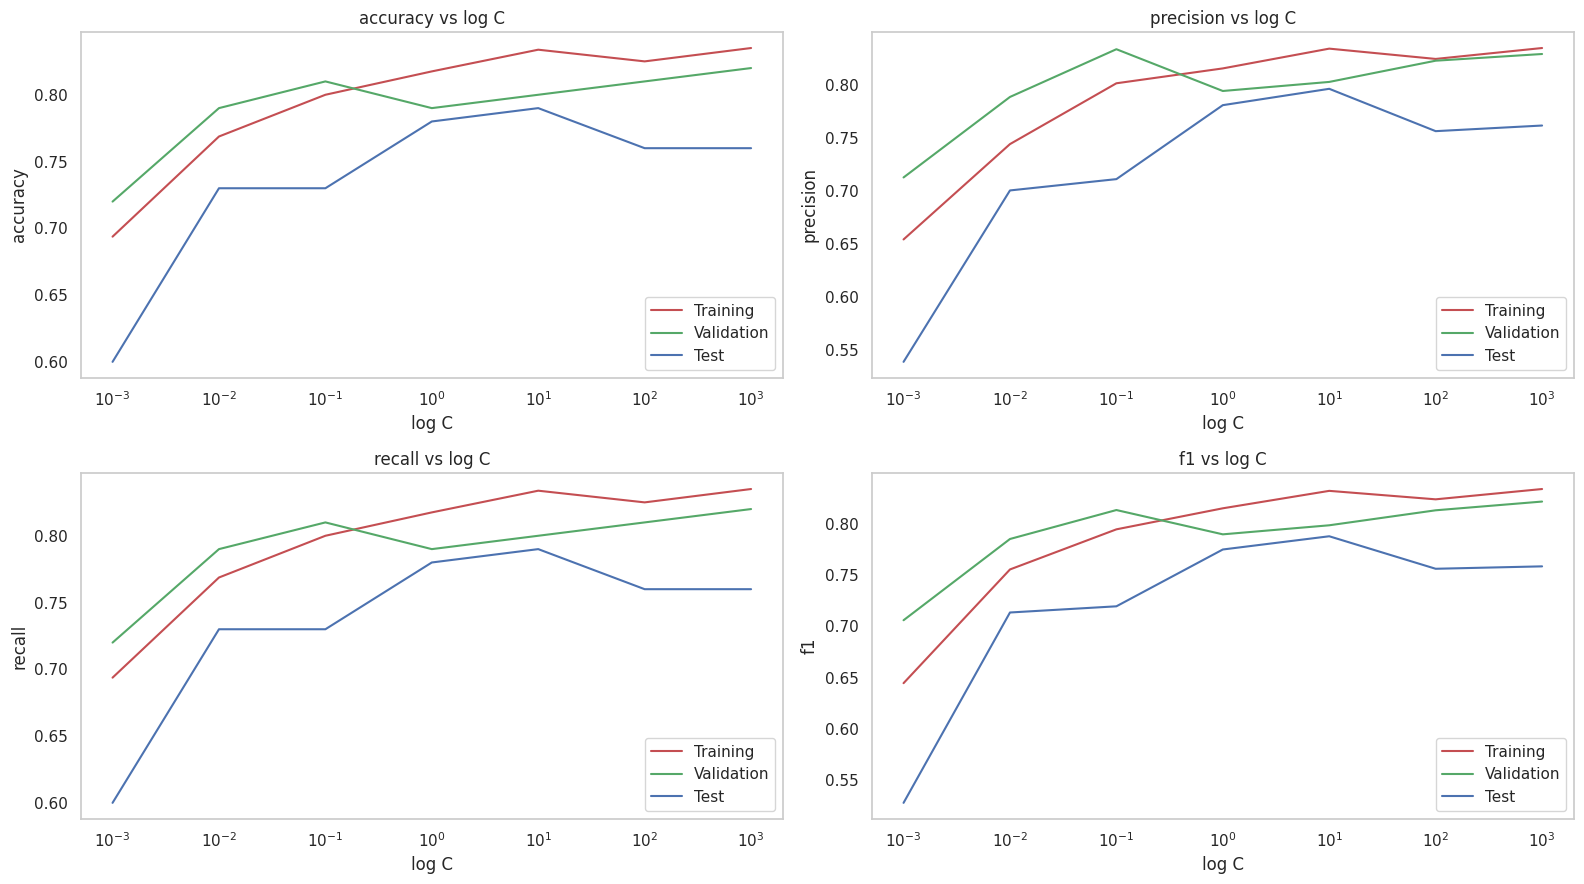

In [100]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Solver = ['newton-cg', 'sag', 'lbfgs']
Max_iter = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

results_C = {'C': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for c in C:
  model = LogisticRegression(multi_class='multinomial', C=c)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_C['C'].append(c)
  results_C['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_C['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_C['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_C['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_C['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_C['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_C['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_C['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_C['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_C['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_C['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_C['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_C['C'], results_C[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_C['C'], results_C[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_C['C'], results_C[f'test_{metric}'], label='Test', color='b')

  plt.xscale('log')
  plt.xlabel('log C')
  plt.ylabel(metric)
  plt.title(f'{metric} vs log C')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Logistic Regression: On the whole, C influences all the hyperparameters positively, and within our range there is not overfitting issue.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

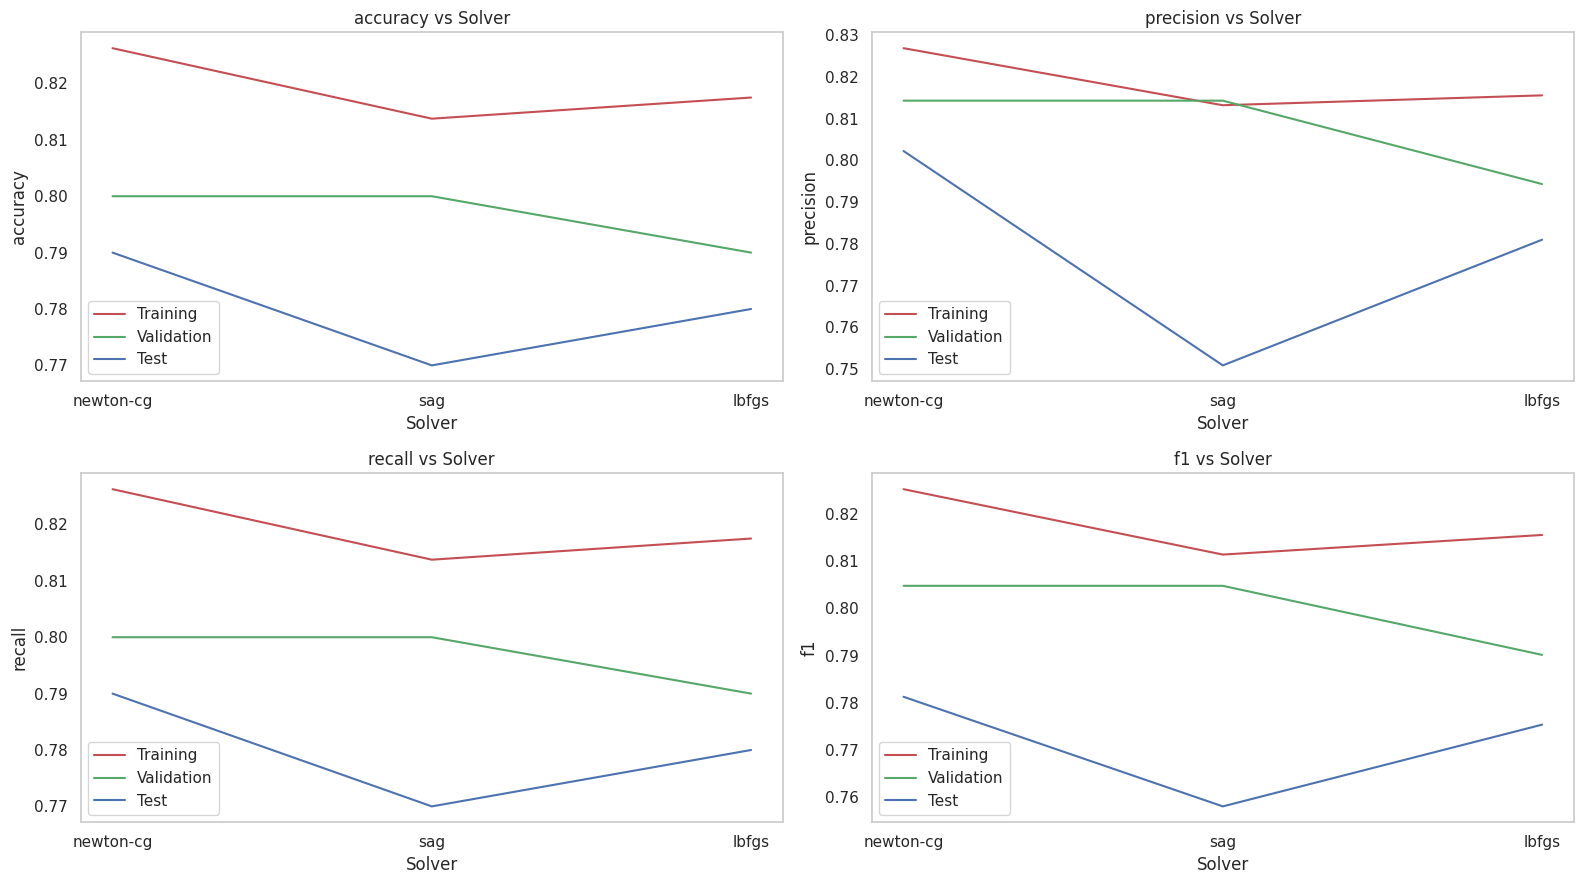

In [101]:
results_Solver = {'Solver': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for solver in Solver:
  model = LogisticRegression(multi_class='multinomial', solver=solver)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Solver['Solver'].append(solver)
  results_Solver['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Solver['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Solver['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Solver['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Solver['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Solver['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Solver['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Solver['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Solver['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Solver['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Solver['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Solver['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Solver['Solver'], results_Solver[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Solver['Solver'], results_Solver[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Solver['Solver'], results_Solver[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Solver')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Solver')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Logistic regression: newton-cg is the best solver.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

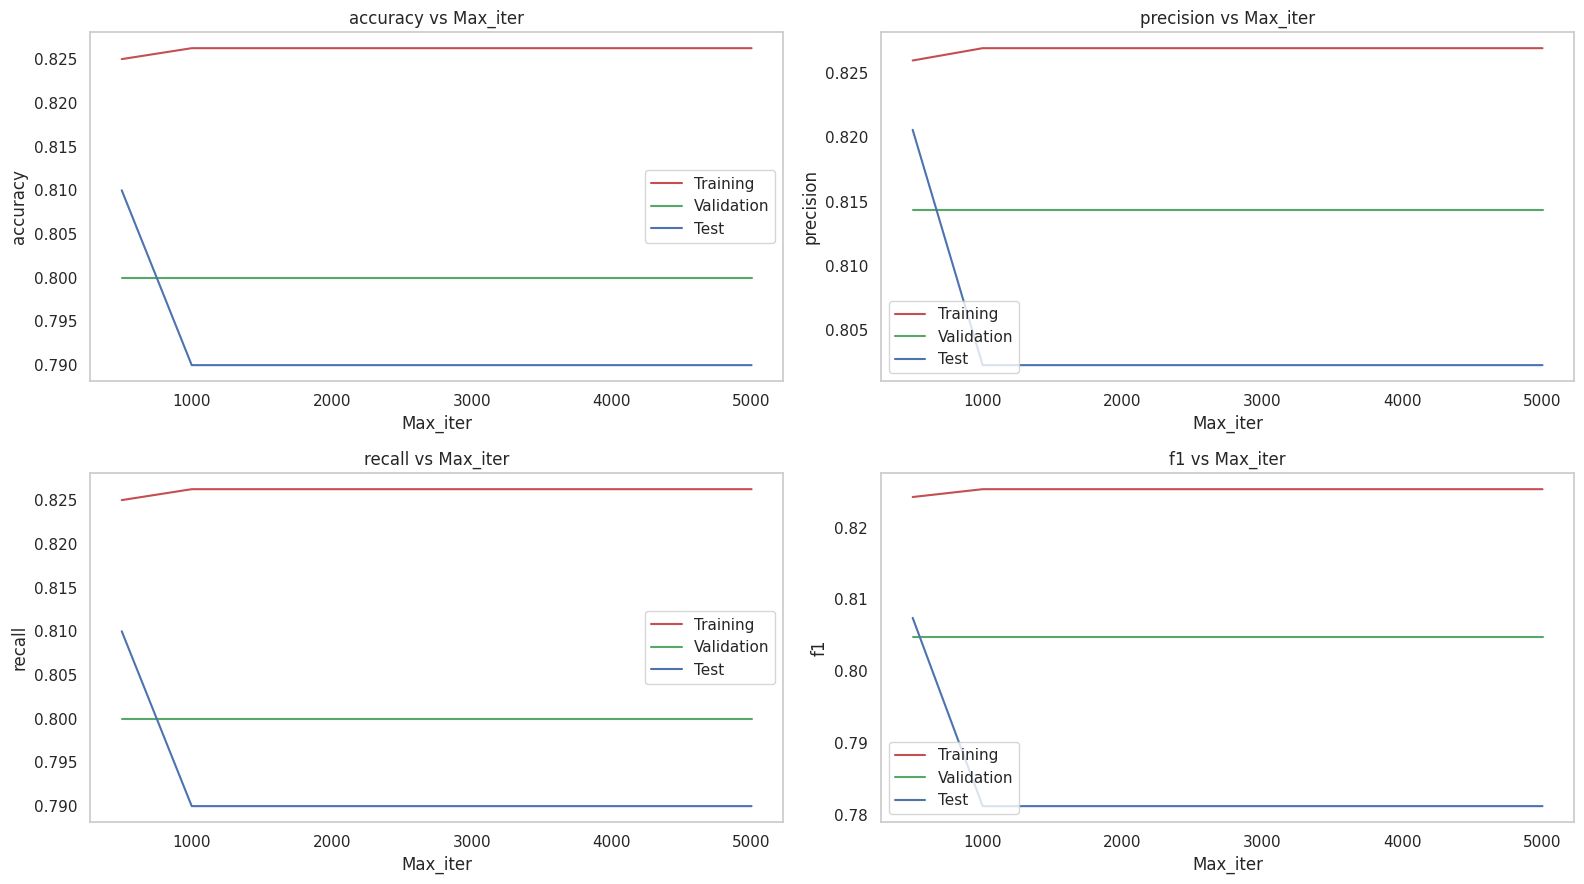

In [102]:
results_Max_iter = {'Max_iter': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for max_iter in Max_iter:
  model = LogisticRegression(multi_class='multinomial', max_iter=max_iter)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Max_iter['Max_iter'].append(max_iter)
  results_Max_iter['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Max_iter['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Max_iter['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Max_iter['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Max_iter['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Max_iter['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Max_iter['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Max_iter['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Max_iter['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Max_iter['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Max_iter['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Max_iter['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Max_iter['Max_iter'], results_Max_iter[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Max_iter['Max_iter'], results_Max_iter[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Max_iter['Max_iter'], results_Max_iter[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Max_iter')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Max_iter')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Logistic regression: max number of iterations does not influence any of the score obviously.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning

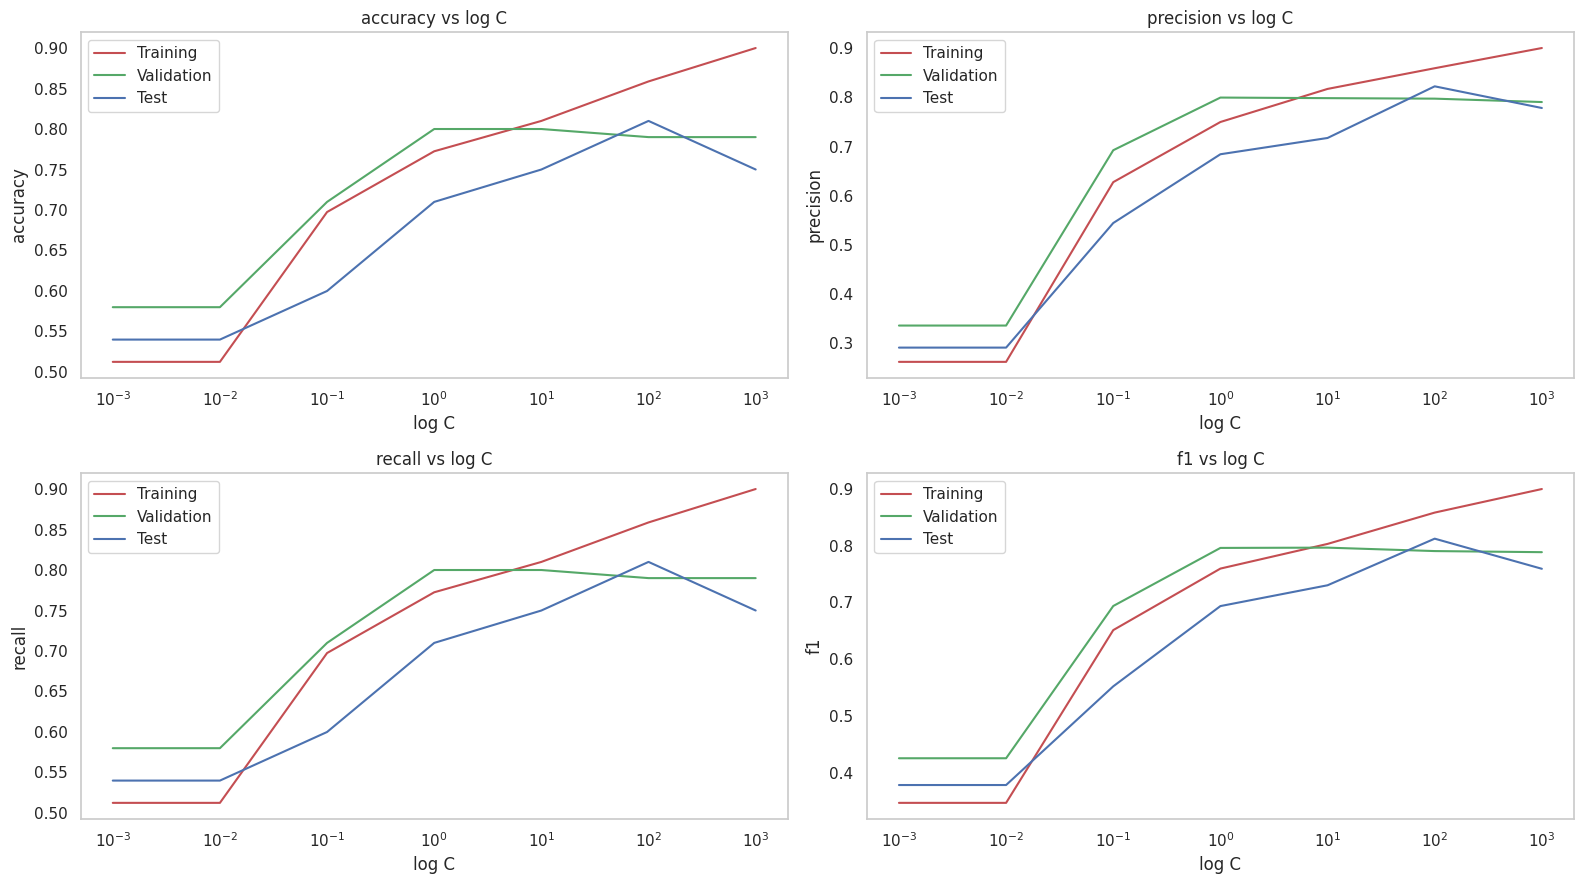

In [103]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Kernel = ['linear', 'poly', 'rbf', 'sigmoid']
Degree = [1,2,3,4,5]
Gamma = ['scale', 'auto']

results_C = {'C': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for c in C:
  model = SVC(C=c)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_C['C'].append(c)
  results_C['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_C['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_C['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_C['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_C['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_C['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_C['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_C['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_C['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_C['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_C['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_C['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_C['C'], results_C[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_C['C'], results_C[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_C['C'], results_C[f'test_{metric}'], label='Test', color='b')

  plt.xscale('log')
  plt.xlabel('log C')
  plt.ylabel(metric)
  plt.title(f'{metric} vs log C')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

SVM: C also influences each of the scores positively on the whole, while sometimes there will be overfitting.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

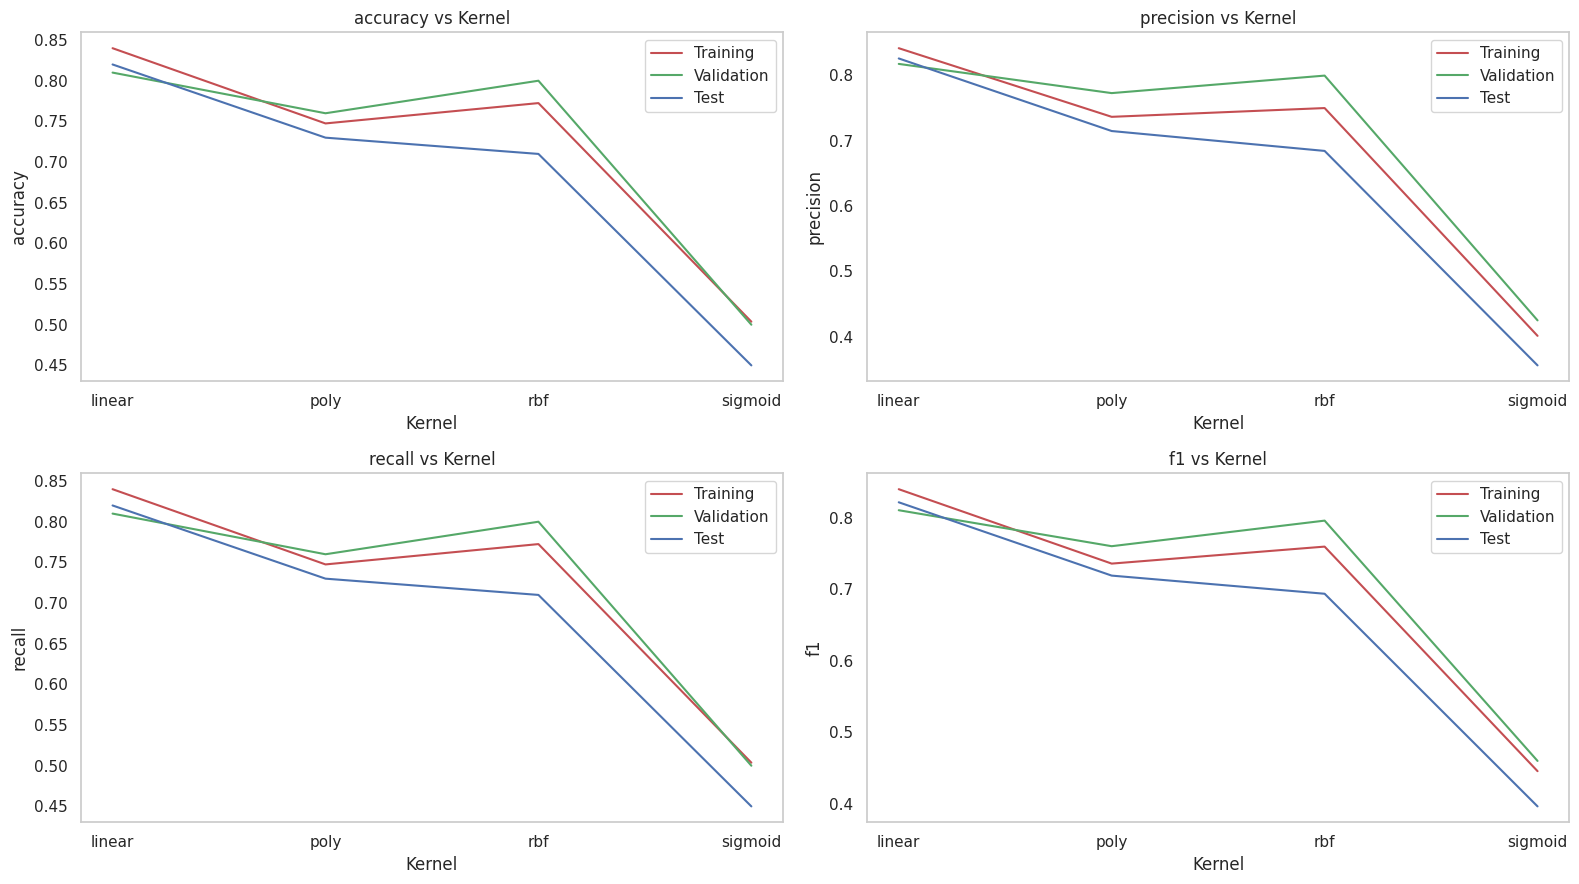

In [104]:
results_Kernel = {'Kernel': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for kernel in Kernel:
  model = SVC(kernel=kernel)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Kernel['Kernel'].append(kernel)
  results_Kernel['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Kernel['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Kernel['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Kernel['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Kernel['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Kernel['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Kernel['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Kernel['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Kernel['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Kernel['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Kernel['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Kernel['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Kernel['Kernel'], results_Kernel[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Kernel['Kernel'], results_Kernel[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Kernel['Kernel'], results_Kernel[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Kernel')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Kernel')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

SVM: The best kernel is linear kernel, then RBF, while the one making the least performance is sigmoid.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning

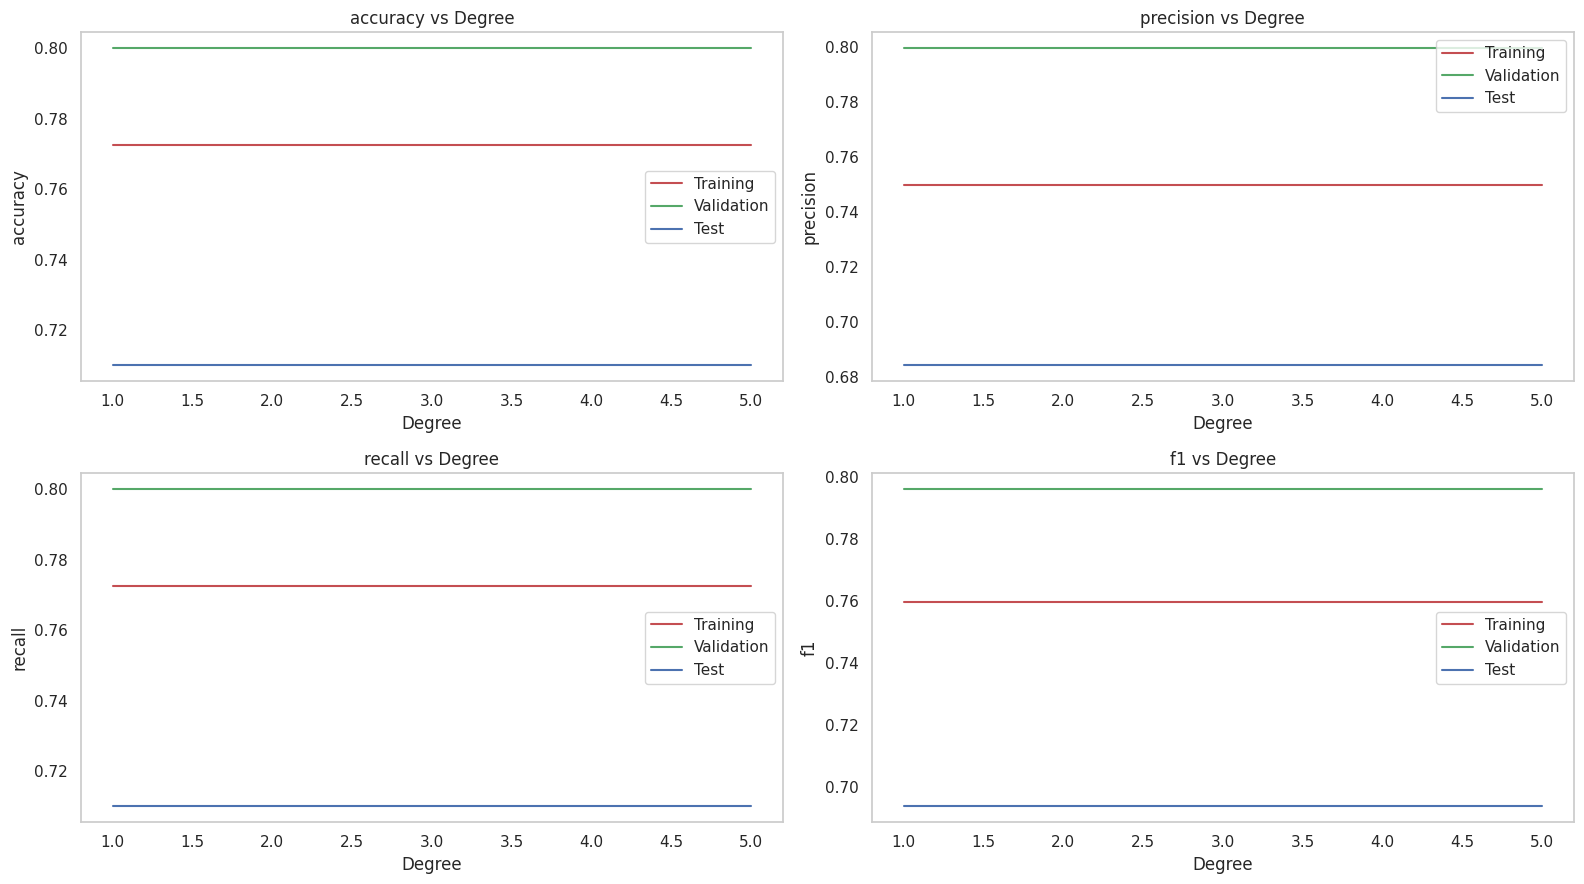

In [105]:
results_Degree = {'Degree': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for degree in Degree:
  model = SVC(degree=degree)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Degree['Degree'].append(degree)
  results_Degree['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Degree['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Degree['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Degree['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Degree['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Degree['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Degree['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Degree['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Degree['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Degree['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Degree['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Degree['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Degree['Degree'], results_Degree[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Degree['Degree'], results_Degree[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Degree['Degree'], results_Degree[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Degree')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Degree')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

SVM: Degree does not influence the performance.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning

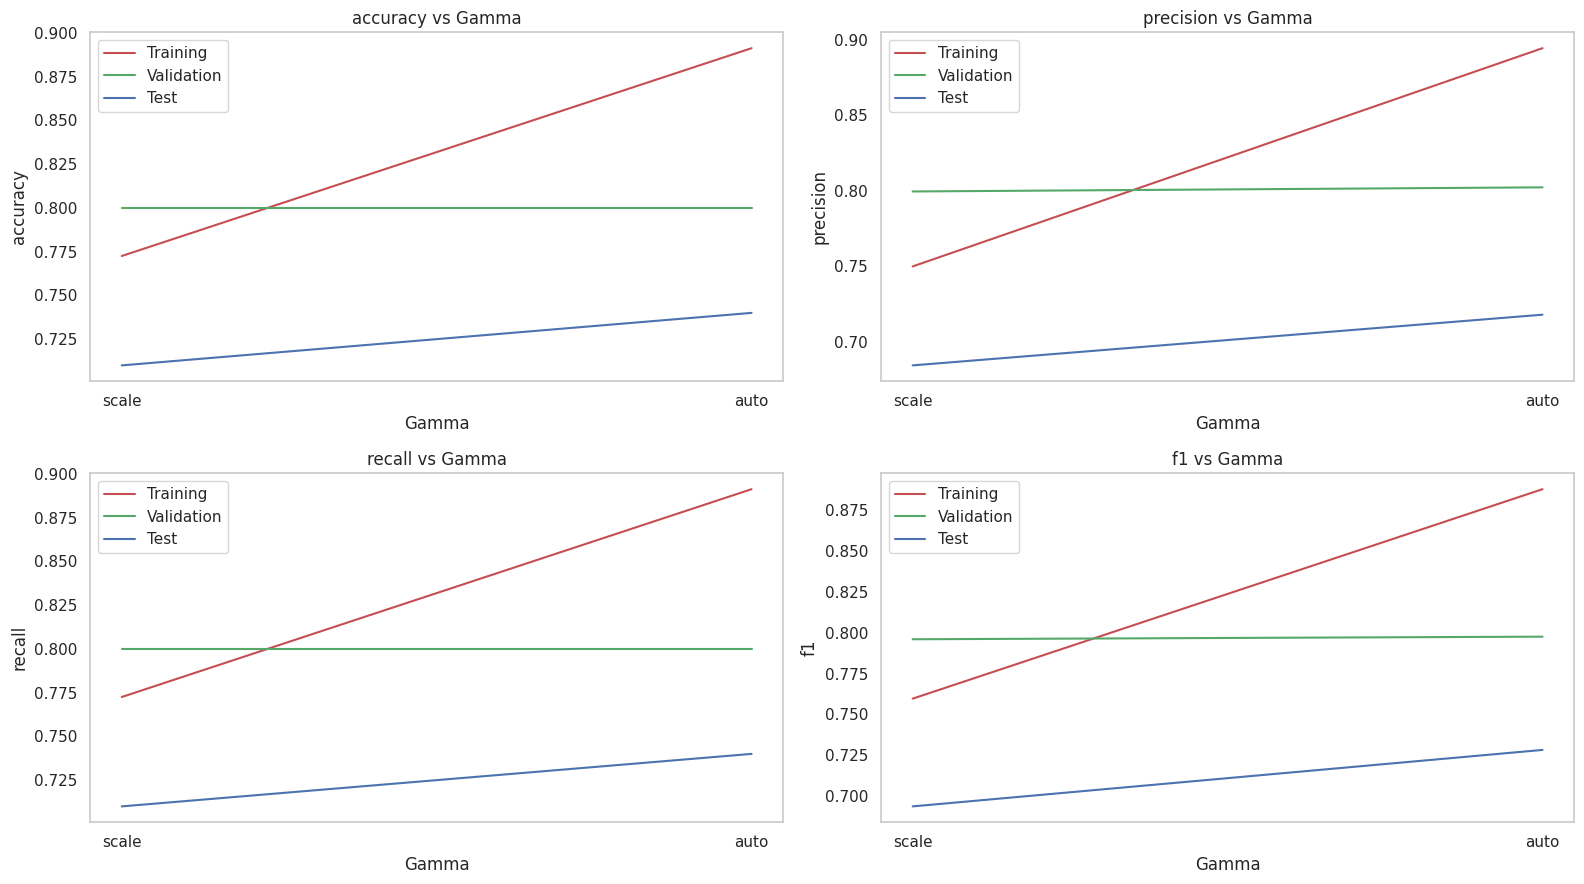

In [106]:
results_Gamma = {'Gamma': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for gamma in Gamma:
  model = SVC(gamma=gamma)
  model.fit(train_data, train_label)
  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Gamma['Gamma'].append(gamma)
  results_Gamma['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Gamma['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Gamma['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Gamma['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Gamma['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Gamma['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Gamma['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Gamma['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Gamma['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Gamma['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Gamma['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Gamma['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Gamma['Gamma'], results_Gamma[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Gamma['Gamma'], results_Gamma[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Gamma['Gamma'], results_Gamma[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Gamma')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Gamma')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()



SVM: Using automatic Gamma makes better performance than scale Gamma.

In [107]:
Max_depth = [3, 4, 5, 6, 7]
N_estimators = [50, 100, 150, 200]
Min_samples_split = list(range(2, 13, 1))
Min_samples_leaf = list(range(1, 11, 1))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarni

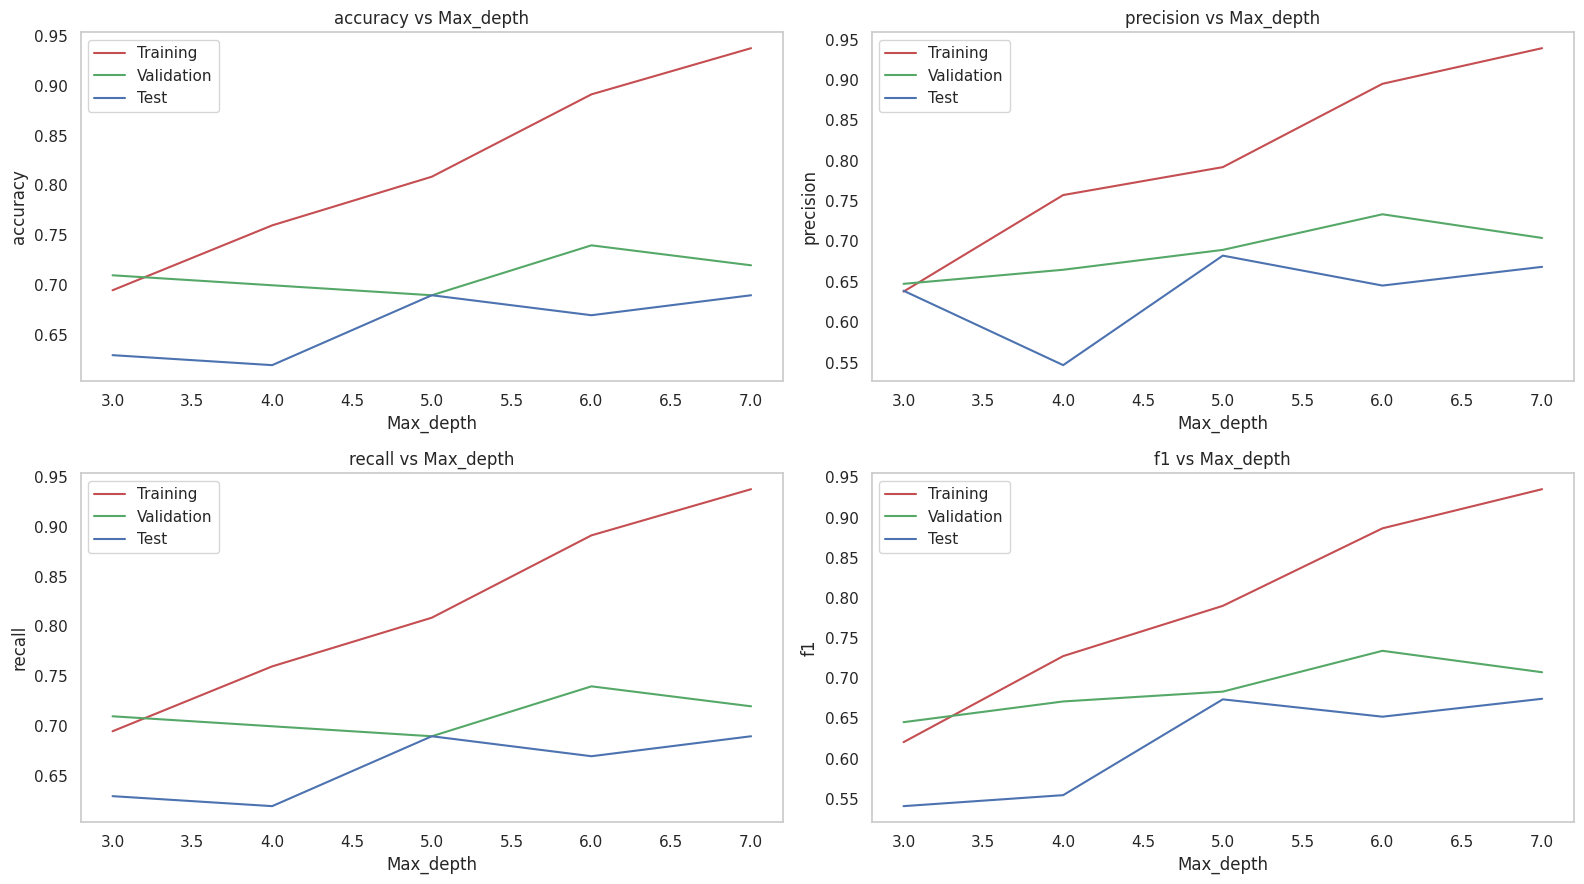

In [108]:
results_Max_depth = {'Max_depth': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for max_depth in Max_depth:
  model = RandomForestClassifier(max_depth=max_depth)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Max_depth['Max_depth'].append(max_depth)
  results_Max_depth['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Max_depth['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Max_depth['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Max_depth['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Max_depth['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Max_depth['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Max_depth['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Max_depth['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Max_depth['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Max_depth['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Max_depth['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Max_depth['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Max_depth['Max_depth'], results_Max_depth[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Max_depth['Max_depth'], results_Max_depth[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Max_depth['Max_depth'], results_Max_depth[f'test_{metric}'], label='Test', color='b')

  plt.xlabel('Max_depth')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Max_depth')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()


Random Forest: maximum depth influences the model positively, and can increase all the evaluation criteria on training data. Within the given range, there maybe signs of overfitting and requires more experiment to prove or counter-prove this.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

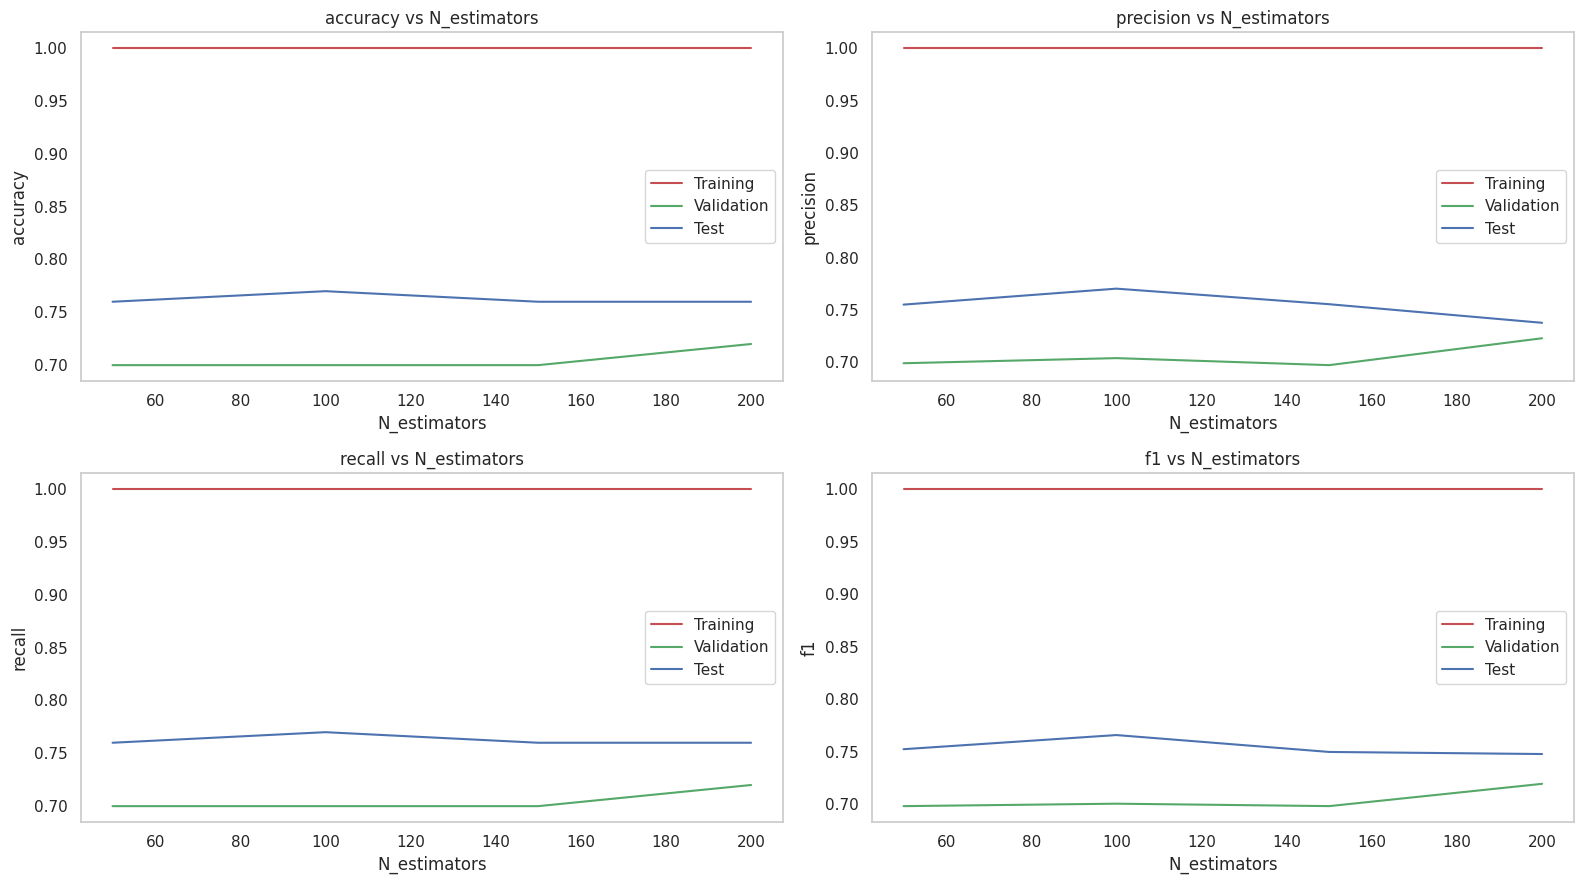

In [109]:
results_N_estimators = {'N_estimators': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for n_estimators in N_estimators:
  model = RandomForestClassifier(n_estimators=n_estimators)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_N_estimators['N_estimators'].append(n_estimators)
  results_N_estimators['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_N_estimators['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_N_estimators['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_N_estimators['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_N_estimators['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_N_estimators['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_N_estimators['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_N_estimators['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_N_estimators['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_N_estimators['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_N_estimators['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_N_estimators['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))

metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_N_estimators['N_estimators'], results_N_estimators[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_N_estimators['N_estimators'], results_N_estimators[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_N_estimators['N_estimators'], results_N_estimators[f'test_{metric}'], label='Test', color='b')
  plt.xlabel('N_estimators')
  plt.ylabel(metric)
  plt.title(f'{metric} vs N_estimators')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()

Random forest: the number of estimators mainly influences the validation scores. However, a larger range of the number of estimators is required to see whether the performance will be improved.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

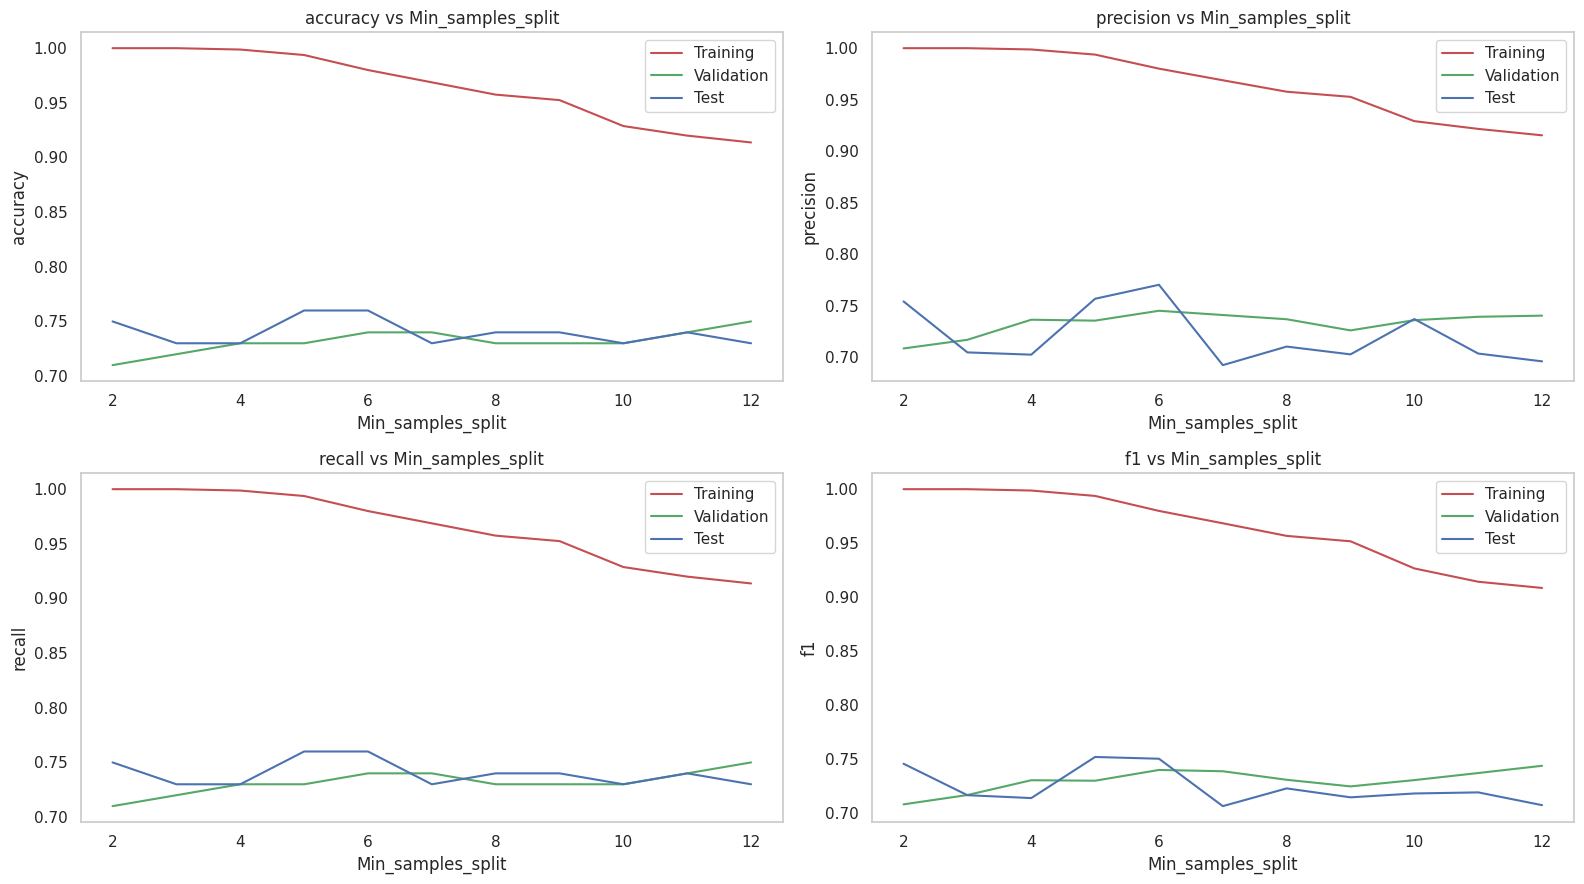

In [110]:
results_Min_samples_split = {'Min_samples_split': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for min_samples_split in Min_samples_split:
  model = RandomForestClassifier(min_samples_split=min_samples_split)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  results_Min_samples_split['Min_samples_split'].append(min_samples_split)
  results_Min_samples_split['train_accuracy'].append(accuracy_score(train_label, train_pred))
  results_Min_samples_split['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  results_Min_samples_split['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  results_Min_samples_split['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  results_Min_samples_split['val_accuracy'].append(accuracy_score(val_label, val_pred))
  results_Min_samples_split['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  results_Min_samples_split['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  results_Min_samples_split['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  results_Min_samples_split['test_accuracy'].append(accuracy_score(test_label, test_pred))
  results_Min_samples_split['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  results_Min_samples_split['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  results_Min_samples_split['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))

metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(results_Min_samples_split['Min_samples_split'], results_Min_samples_split[f'train_{metric}'], label='Training', color='r')
  plt.plot(results_Min_samples_split['Min_samples_split'], results_Min_samples_split[f'val_{metric}'], label='Validation', color='g')
  plt.plot(results_Min_samples_split['Min_samples_split'], results_Min_samples_split[f'test_{metric}'], label='Test', color='b')
  plt.xlabel('Min_samples_split')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Min_samples_split')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()


Random forest: Obviously, when the minimum number of samples for spliting increases, underfitting will occur.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector 

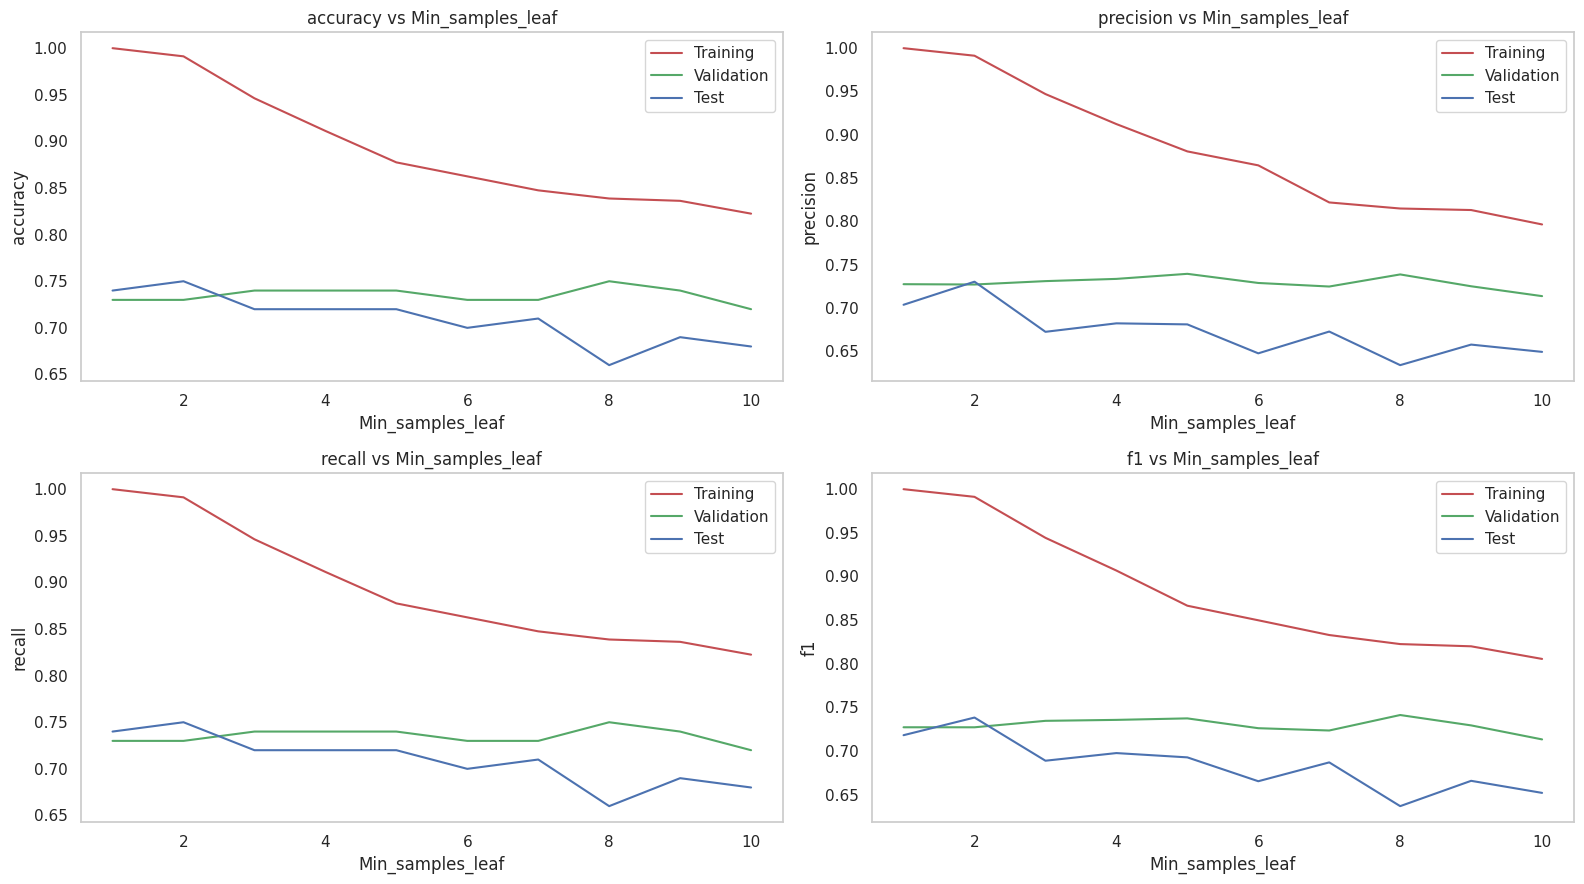

In [111]:
result_Min_samples_leaf = {'Min_samples_leaf': [],
             'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
             'val_accuracy': [], 'val_precision': [], 'val_recall': [], 'val_f1': [],
             'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []}

for min_samples_leaf in Min_samples_leaf:
  model = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
  model.fit(train_data, train_label)

  train_pred = model.predict(train_data)
  val_pred = model.predict(val_data)
  test_pred = model.predict(test_data)

  result_Min_samples_leaf['Min_samples_leaf'].append(min_samples_leaf)
  result_Min_samples_leaf['train_accuracy'].append(accuracy_score(train_label, train_pred))
  result_Min_samples_leaf['train_precision'].append(precision_score(train_label, train_pred, average='weighted'))
  result_Min_samples_leaf['train_recall'].append(recall_score(train_label, train_pred, average='weighted'))
  result_Min_samples_leaf['train_f1'].append(f1_score(train_label, train_pred, average='weighted'))
  result_Min_samples_leaf['val_accuracy'].append(accuracy_score(val_label, val_pred))
  result_Min_samples_leaf['val_precision'].append(precision_score(val_label, val_pred, average='weighted'))
  result_Min_samples_leaf['val_recall'].append(recall_score(val_label, val_pred, average='weighted'))
  result_Min_samples_leaf['val_f1'].append(f1_score(val_label, val_pred, average='weighted'))
  result_Min_samples_leaf['test_accuracy'].append(accuracy_score(test_label, test_pred))
  result_Min_samples_leaf['test_precision'].append(precision_score(test_label, test_pred, average='weighted'))
  result_Min_samples_leaf['test_recall'].append(recall_score(test_label, test_pred, average='weighted'))
  result_Min_samples_leaf['test_f1'].append(f1_score(test_label, test_pred, average='weighted'))


metrics = ['accuracy', 'precision', 'recall', 'f1']
plt.figure(figsize=(16, 9))

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  plt.plot(result_Min_samples_leaf['Min_samples_leaf'], result_Min_samples_leaf[f'train_{metric}'], label='Training', color='r')
  plt.plot(result_Min_samples_leaf['Min_samples_leaf'], result_Min_samples_leaf[f'val_{metric}'], label='Validation', color='g')
  plt.plot(result_Min_samples_leaf['Min_samples_leaf'], result_Min_samples_leaf[f'test_{metric}'], label='Test', color='b')
  plt.xlabel('Min_samples_leaf')
  plt.ylabel(metric)
  plt.title(f'{metric} vs Min_samples_leaf')
  plt.legend()
  plt.grid()

plt.tight_layout()
plt.show()


Random forest: Also, similar to the minimum number of samples for splitting, when the minimum number of samples for making leaf nodes, the model will begin to underfit the data.

##Q5

Here we will test the scores by ensembled classifiers (hard voting, small voting, stacking) and single best classification models and compare them.

In [112]:
# Voting classifier - Hard
from sklearn.ensemble import VotingClassifier

regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly')
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

voting_classifier = VotingClassifier(estimators=[('regression', regression), ('support_vector_machine', support_vector_machine), ('random_forest', random_forest)], voting='hard')
voting_classifier.fit(train_data, train_label)

train_pred = voting_classifier.predict(train_data)
val_pred = voting_classifier.predict(val_data)
test_pred = voting_classifier.predict(test_data)

Hard_vote_scores = {}

Hard_vote_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
Hard_vote_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
Hard_vote_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
Hard_vote_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
Hard_vote_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
Hard_vote_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
Hard_vote_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
Hard_vote_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
Hard_vote_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
Hard_vote_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
Hard_vote_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
Hard_vote_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
# Voting classifier - Soft
from sklearn.ensemble import VotingClassifier

regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly', probability=True)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

voting_classifier = VotingClassifier(estimators=[('regression', regression), ('support_vector_machine', support_vector_machine), ('random_forest', random_forest)], voting='soft')
voting_classifier.fit(train_data, train_label)

train_pred = voting_classifier.predict(train_data)
val_pred = voting_classifier.predict(val_data)
test_pred = voting_classifier.predict(test_data)

Soft_vote_scores = {}

Soft_vote_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
Soft_vote_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
Soft_vote_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
Soft_vote_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
Soft_vote_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
Soft_vote_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
Soft_vote_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
Soft_vote_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
Soft_vote_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
Soft_vote_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
Soft_vote_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
Soft_vote_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [114]:
# Stacking
from sklearn.ensemble import StackingClassifier

regression = LogisticRegression(C=100, max_iter=500, solver='newton-cg')
support_vector_machine = SVC(C=0.1, degree=2, gamma='scale', kernel='poly', probability=True)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50)

stacking_classifier = StackingClassifier(estimators=[('regression', regression), ('support_vector_machine', support_vector_machine), ('random_forest', random_forest)], final_estimator=LogisticRegression())
stacking_classifier.fit(train_data, train_label)

train_pred = stacking_classifier.predict(train_data)
val_pred = stacking_classifier.predict(val_data)
test_pred = stacking_classifier.predict(test_data)

Stacking_scores = {}

Stacking_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
Stacking_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
Stacking_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
Stacking_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
Stacking_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
Stacking_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
Stacking_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
Stacking_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
Stacking_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
Stacking_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
Stacking_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
Stacking_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [115]:
regression = LogisticRegression(C=1000, max_iter=2000, solver='sag')

regression.fit(train_data, train_label)

train_pred = regression.predict(train_data)
val_pred = regression.predict(val_data)
test_pred = regression.predict(test_data)

best_regression_scores = {}

best_regression_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
best_regression_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
best_regression_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
best_regression_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
best_regression_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
best_regression_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
best_regression_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
best_regression_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
best_regression_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
best_regression_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
best_regression_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
best_regression_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
support_vector_machine = SVC(C=1000, degree=1, gamma='auto', kernel='poly', probability=True)
support_vector_machine.fit(train_data, train_label)

train_pred = support_vector_machine.predict(train_data)
val_pred = support_vector_machine.predict(val_data)
test_pred = support_vector_machine.predict(test_data)

best_SVM_scores = {}

best_SVM_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
best_SVM_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
best_SVM_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
best_SVM_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
best_SVM_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
best_SVM_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
best_SVM_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
best_SVM_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
best_SVM_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
best_SVM_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
best_SVM_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
best_SVM_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
random_forest = RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=200)
random_forest.fit(train_data, train_label)

train_pred = random_forest.predict(train_data)
val_pred = random_forest.predict(val_data)
test_pred = random_forest.predict(test_data)

best_RF_scores = {}

best_RF_scores['train_accuracy'] = accuracy_score(train_label, train_pred)
best_RF_scores['train_precision'] = precision_score(train_label, train_pred, average="weighted")
best_RF_scores['train_recall'] = recall_score(train_label, train_pred, average="weighted")
best_RF_scores['train_f1'] = f1_score(train_label, train_pred, average="weighted")
best_RF_scores['val_accuracy'] = accuracy_score(val_label, val_pred)
best_RF_scores['val_precision'] = precision_score(val_label, val_pred, average="weighted")
best_RF_scores['val_recall'] = recall_score(val_label, val_pred, average="weighted")
best_RF_scores['val_f1'] = f1_score(val_label, val_pred, average="weighted")
best_RF_scores['test_accuracy'] = accuracy_score(test_label, test_pred)
best_RF_scores['test_precision'] = precision_score(test_label, test_pred, average="weighted")
best_RF_scores['test_recall'] = recall_score(test_label, test_pred, average="weighted")
best_RF_scores['test_f1'] = f1_score(test_label, test_pred, average="weighted")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


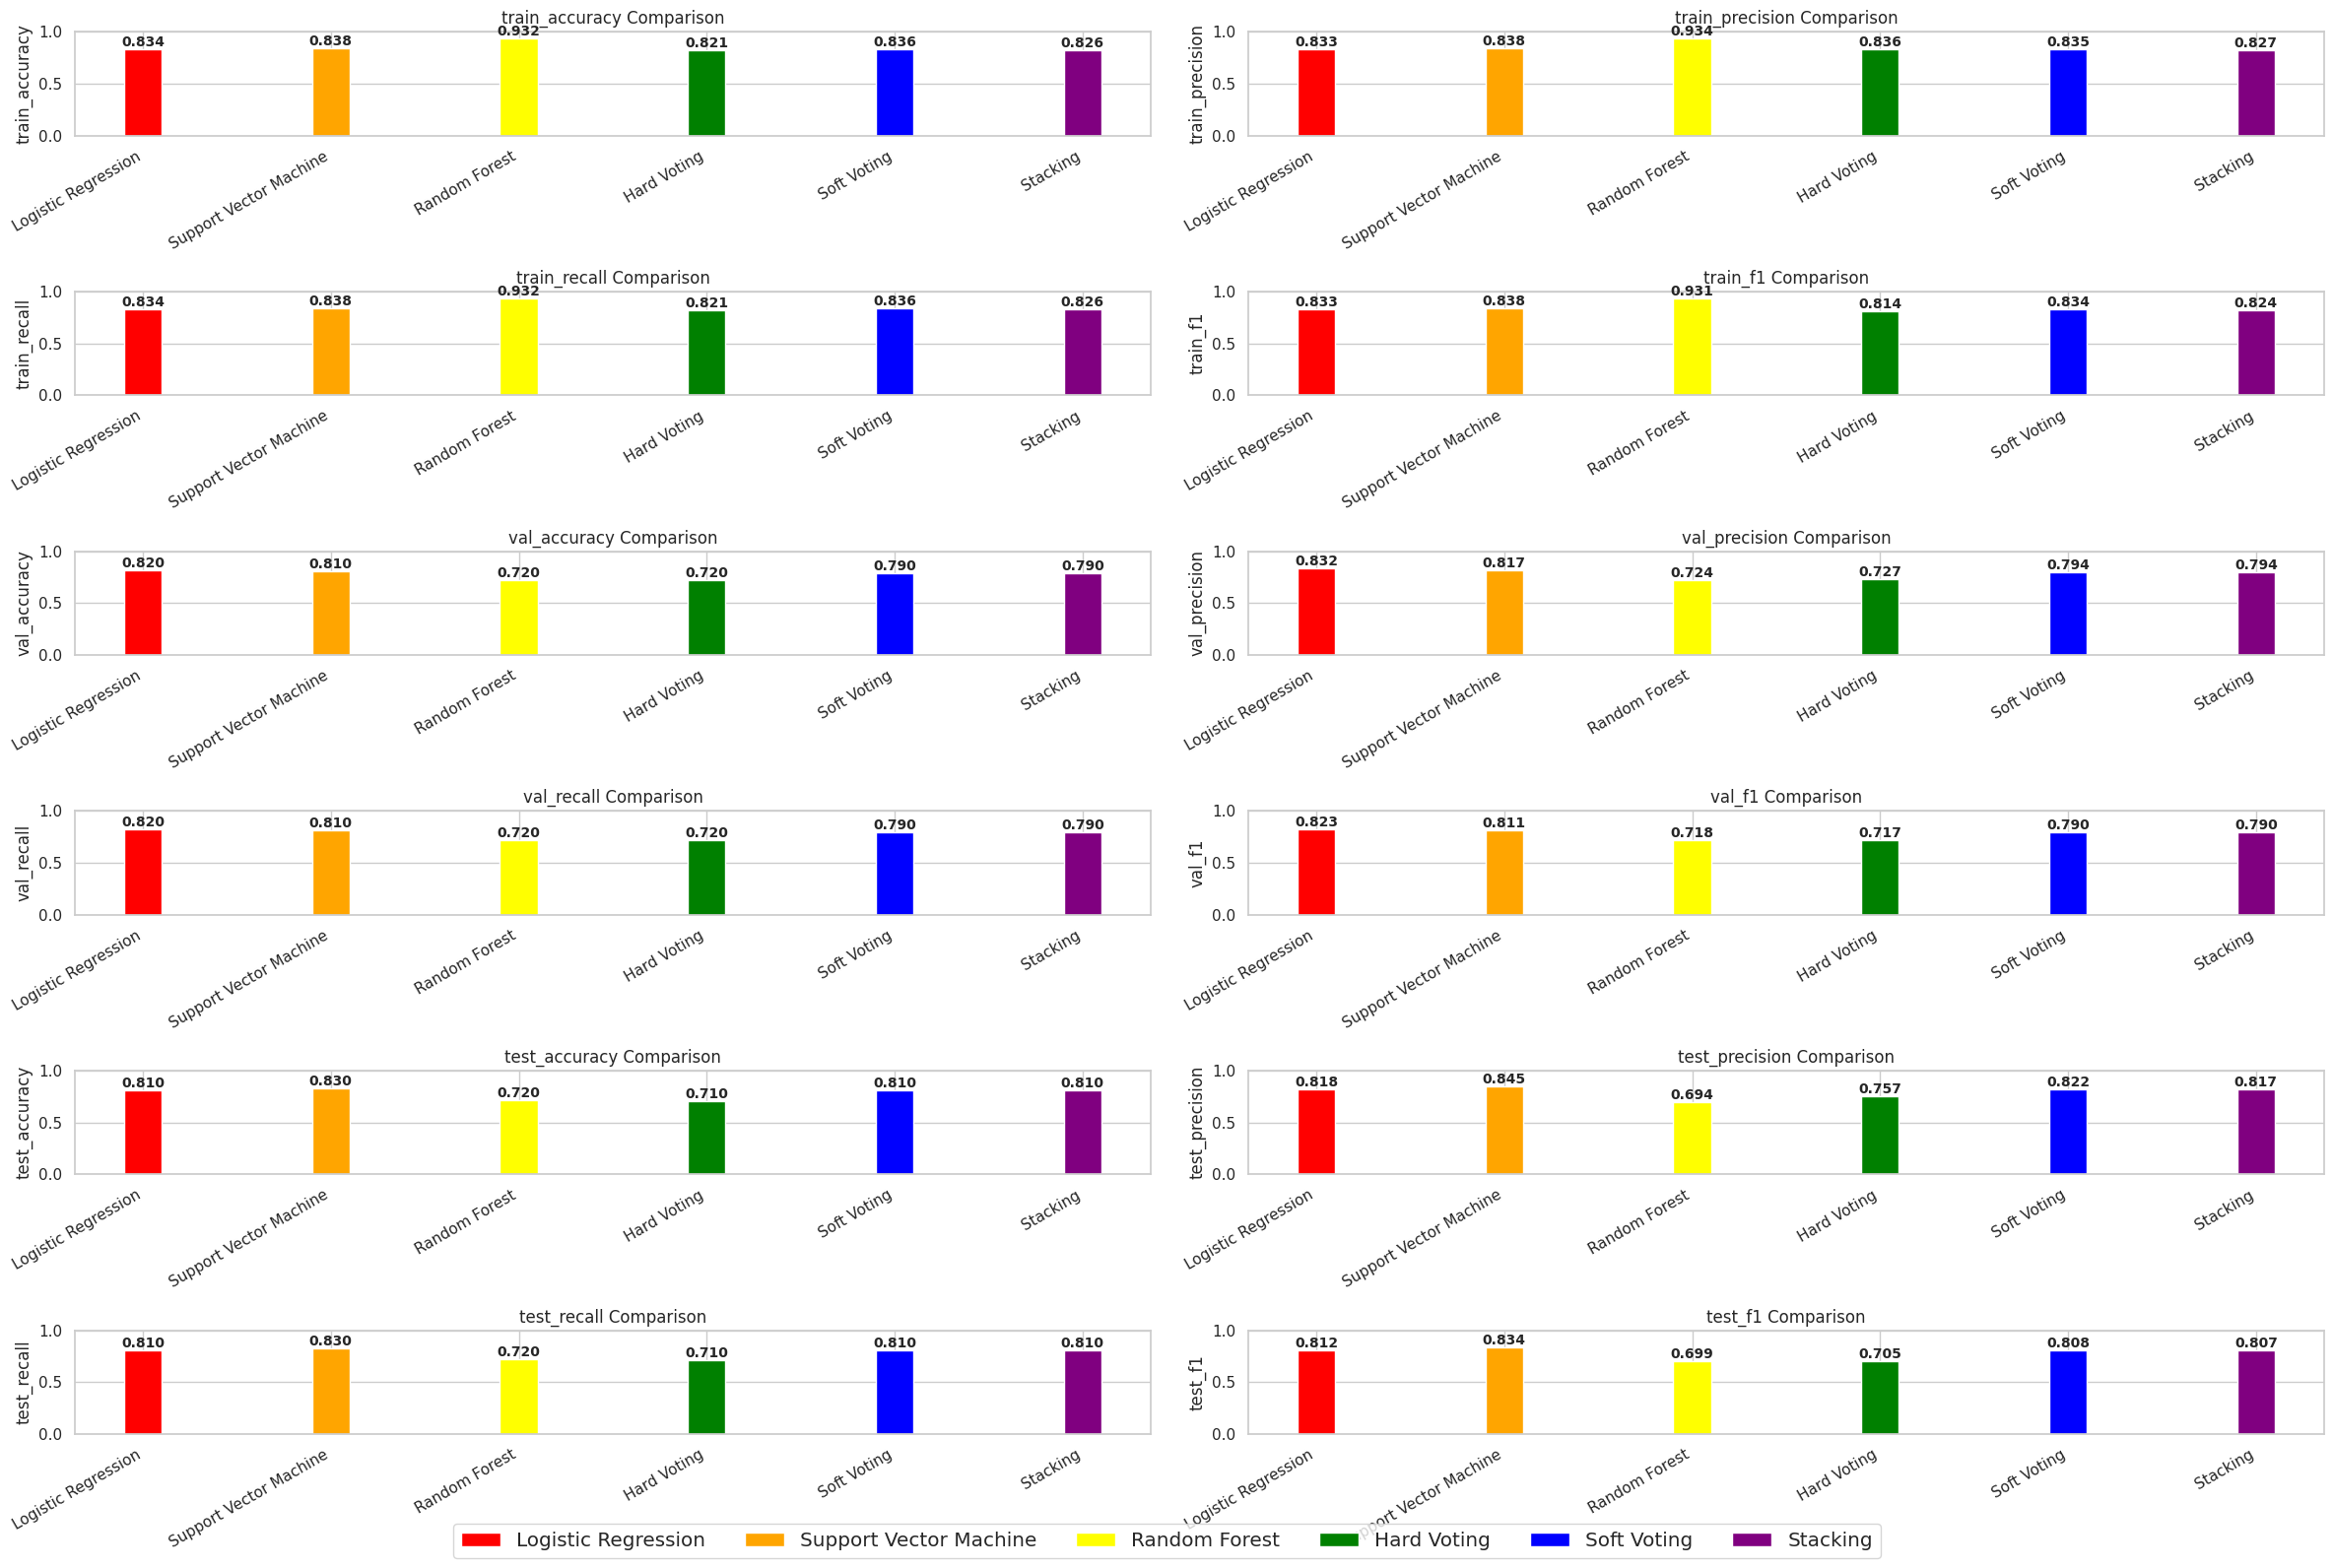

In [138]:
models_scores = {
    'Logistic Regression': best_regression_scores,
    'Support Vector Machine': best_SVM_scores,
    'Random Forest': best_RF_scores,
    'Hard Voting': Hard_vote_scores,
    'Soft Voting': Soft_vote_scores,
    'Stacking': Stacking_scores
}

metrics = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1',
           'val_accuracy', 'val_precision', 'val_recall', 'val_f1',
           'test_accuracy', 'test_precision', 'test_recall', 'test_f1']

num_models = len(models_scores)
num_metrics = len(metrics)

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(24, 16))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
  ax = axes[idx]
  x = np.arange(num_models)
  width = 0.2

  bars = []
  for i, (model, color) in enumerate(zip(models_scores.keys(), colors)):
    scores = models_scores[model]
    bar = ax.bar(x[i], scores[metric], width, label=model, color=color)
    for rect in bar:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, f"{height:.3f}",
                    ha="center", va="bottom", fontsize=10, fontweight="bold")

  ax.set_xticks(x)
  ax.set_xticklabels(models_scores.keys(), rotation=30, ha='right')
  ax.set_ylim(0, 1)
  ax.set_ylabel(metric)
  ax.set_title(f'{metric} Comparison')


fig.legend(models_scores.keys(), loc='lower center', ncol=6, fontsize='large')
plt.tight_layout()
plt.show()

Obviously, for training, Random Forest outperforms; for validation, Logistic regression outperforms; for test, Support vector machine outperforms.

For ensembled models, soft voting models outperforms in all kinds of datasets, combining the strengths of all three individual models.